In [71]:
import os
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

ksdir = '/hdd/Antonin/Hearlight_019_Paper/901837_231029_163835'
fs = 20000
n_chan = 64

In [72]:
# Load digital input
f = open(os.path.join(ksdir, 'digitalin.dat'), 'rb') 
sd_array = np.fromfile(f, np.uint16)
f.close()

# Extract stimulus times based on digital input
sd_array_on = np.where(np.insert(np.diff(sd_array), 0, 0) == 1)[0]
sd_array_off = np.where(np.insert(np.diff(sd_array), 0, 0) == -1)[0]

In [89]:
f = open(os.path.join(ksdir, 'amplifier.dat'), 'rb') 
amp_array = np.fromfile(f, np.int16)
f.close()

amp_array = amp_array.reshape(-1, 64).T

In [73]:
# Get all spike_times
sorted_path = 'kilosort2/sorter_output'
sp_times = np.load(os.path.join(ksdir, sorted_path, 'spike_times.npy'))
sp_times = np.array([i[0] for i in sp_times])


sp_clu = np.load(os.path.join(ksdir, sorted_path, 'spike_clusters.npy'))

clu_gp = pd.read_csv(os.path.join(ksdir, sorted_path, 'cluster_group.tsv'), delimiter='\t')
clu_gp = clu_gp['group'].to_numpy()

usable_clusters = [i for i, clu in enumerate(clu_gp) if clu == 'good']

usable_sp = np.isin(sp_clu, usable_clusters)
sp_times = sp_times[usable_sp]
sp_clu = sp_clu[usable_sp]

idxs_clu = []
for clu in np.unique(sp_clu):
    idxs_clu.append(np.where(sp_clu == clu)[0])
n_clu = len(idxs_clu)

In [75]:
stims_ttls = np.arange(0, len(sd_array_on), 10)
first_ttls = [sd_array_on[s] for s in stims_ttls]

protocol = np.load('/home/user/share/gaia/Data/Electrophysiology/Antonin/Hearlight_019_Paper/protocol_config_EXP_DEV_019_4-NO-REPETITIONS.npy')

print(protocol.shape[0], len(first_ttls))
if protocol.shape[0] != len(first_ttls):
    protocol = protocol[:len(first_ttls)]
print(protocol[10:]) # Shape is LED, intensity, number of pulse


5030 4473
[[43.  1. 10.]
 [43.  2. 10.]
 [ 4.  0. 10.]
 ...
 [52.  2. 10.]
 [16.  0. 10.]
 [16.  1. 10.]]


In [ ]:
# Plot each LED activity for a cluster

n_bins = 20

for c, idx_clu in enumerate(idxs_clu):
    sp = sp_times[idx_clu] # Select spikes relative a one cluster
    spikes = sp[(sp > led - 10000) & (sp < led + 10000)] # Consider only spikes 10000 tp before and after LED stim
    np.histogram(spikes - (led - 10000) , bins=n_bins, range=(0, 20000))[0] # count spike number per timebin


In [49]:
coords = [(9,9), (8,9), (6,9), (5,9), (0,9), 
          (9,8), (8,8), (7,8), (6,8), (5,8), (4,8), (3,8), (1,8), 
          (9,7), (8,7), (7,7), (6,7), (5,7), (4,7), (3,7), (2,7), (1,7), (0,7), 
          (9,6), (8,6), (7,6), (6,6), (5,6), (4,6), (3,6), (1,6), 
          (9,5), (8,5), (7,5), (6,5), (5,5), (4,5), (2,5), (1,5), 
          (9,4), (7,4), (6,4), (5,4), (4,4), (3,4), (2,4), (0,4), 
          (9,3), (8,3), (7,3), (6,3), (5,3), (4,3), (3,3), (1,3), (0,3), 
          (9,2), (8,2), (7,2), (1,2), (0,2), 
          (9,1), (8,1), (7,1), (4,1), (3,1), 
          (9,0), (8,0), (7,0), (6,0), (4,0), (2,0), (1,0), (0,0)]

In [76]:
from rich.progress import track
#Extract activity of each trial 
n_bins = 20
activity = np.empty((len(first_ttls), len(idxs_clu), n_bins))
for i, trial in track(enumerate(protocol), total=len(protocol)):
    led_time = first_ttls[i]
    for c, idx_clu in enumerate(idxs_clu):
        sp = sp_times[idx_clu] # Select spikes relative a one cluster
        spikes = sp[(sp > led_time - 10000) & (sp < led_time + 10000)] # Consider only spikes 10000 tp before and after LED stim
        activity[i, c] = np.histogram(spikes - (led_time - 10000) , bins=n_bins, range=(0, 20000))[0] # count spike number per timebin
        

        
    

Output()

nan


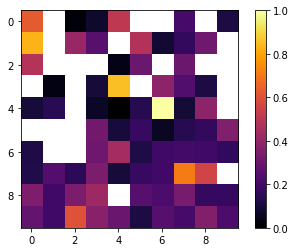

nan


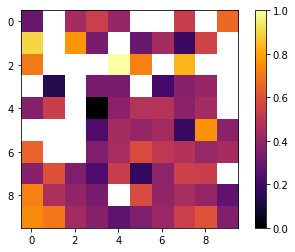

nan


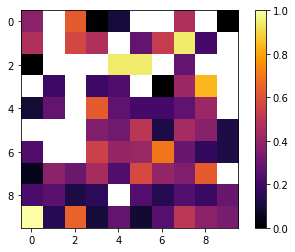

nan


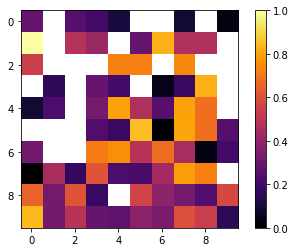

nan


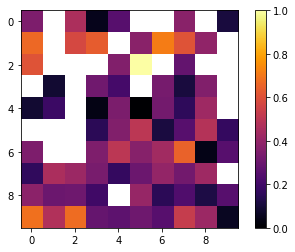

nan


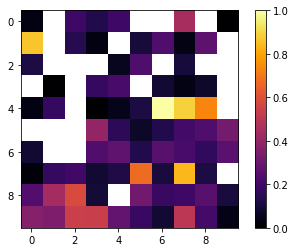

nan


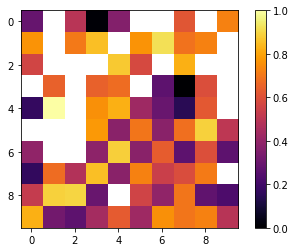

nan


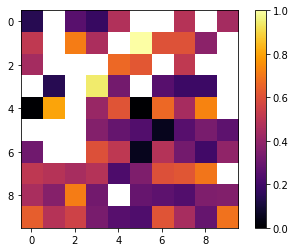

nan


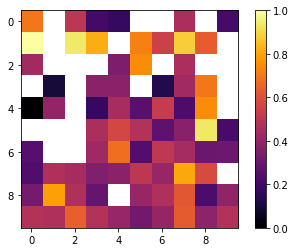

nan


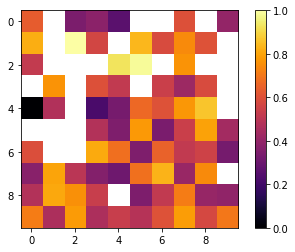

nan


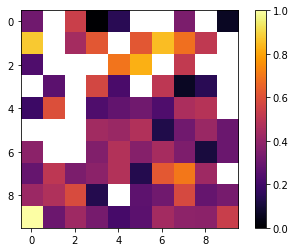

nan


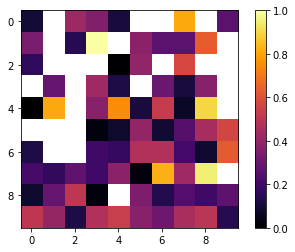

nan


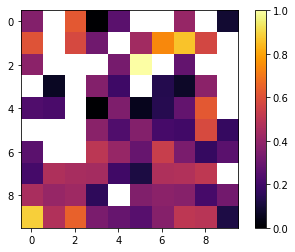

nan


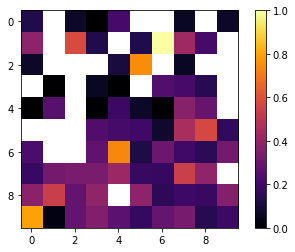

nan


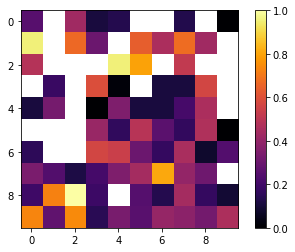

nan


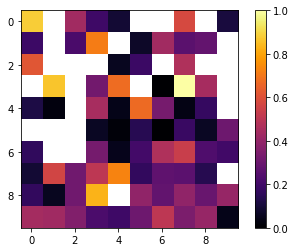

nan


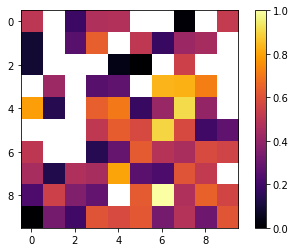

nan


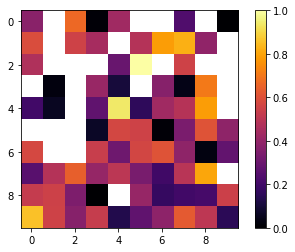

nan


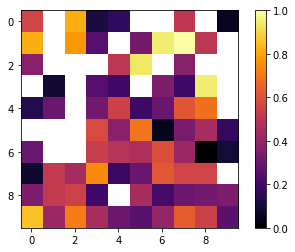

nan


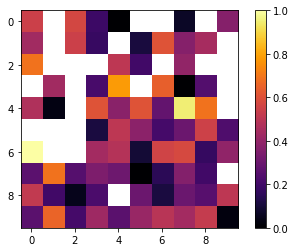

nan


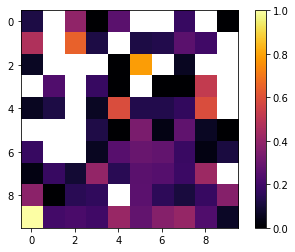

nan


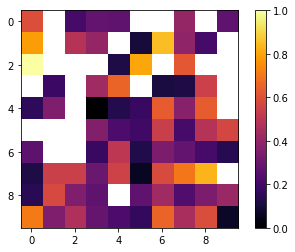

nan


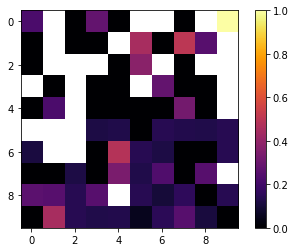

nan


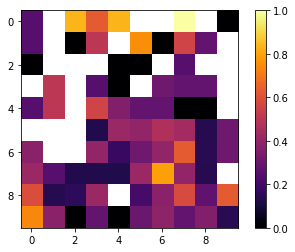

nan


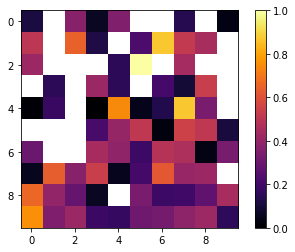

nan


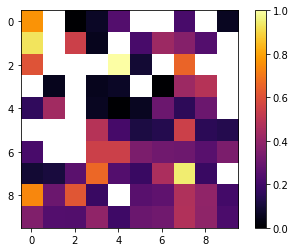

nan


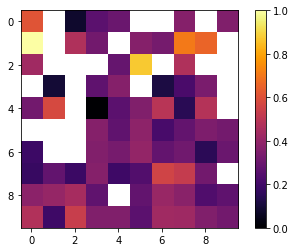

nan


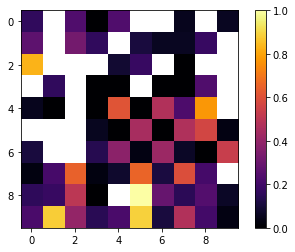

nan


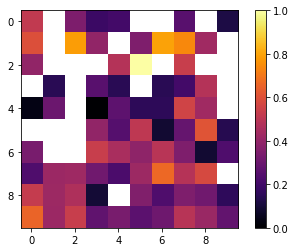

nan


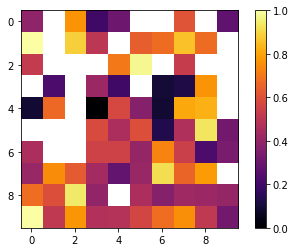

nan


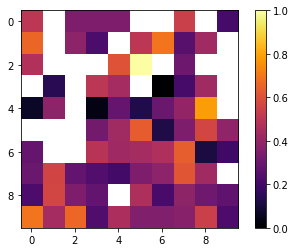

nan


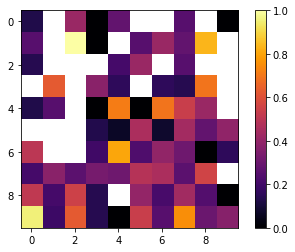

nan


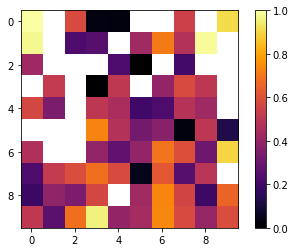

nan


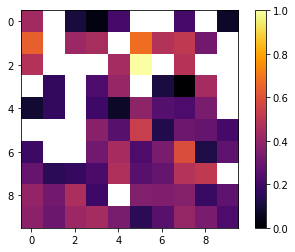

nan


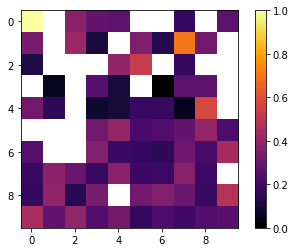

nan


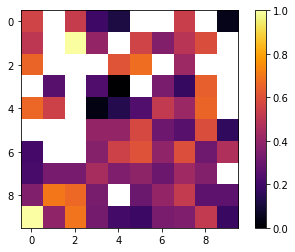

nan


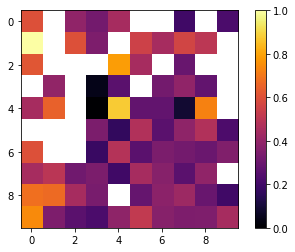

nan


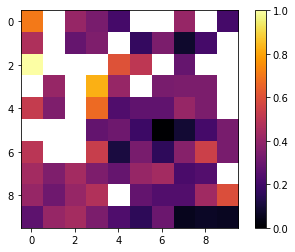

nan


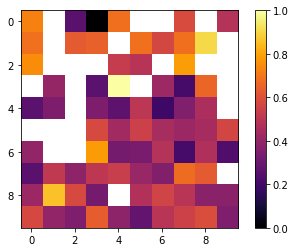

nan


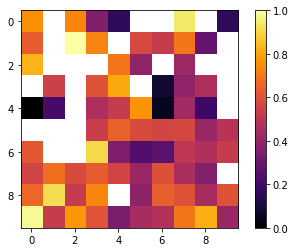

nan


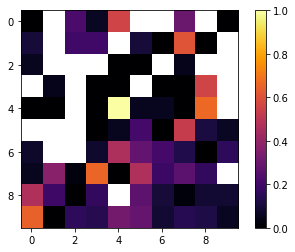

nan


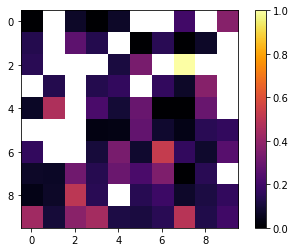

In [84]:
for c, idx_clu in enumerate(idxs_clu):
    grid = np.empty((10, 10))
    grid[:] = np.nan
    for l in np.unique(protocol[:, 0]):
        current_trials = np.where((protocol[:, 0] == l) & (protocol[:, 1] == 2))[0]
        current_activity = activity[current_trials, c, :]
        mean_activity = np.mean(current_activity, axis=0)
        grid[coords[int(l)]] = np.mean(mean_activity[10:])
    
    print(np.min(grid))
    grid = (grid - np.nanmin(grid)) / (np.nanmax(grid) - np.nanmin(grid))
    plt.imshow(grid, cmap='inferno', vmax=1)
    plt.colorbar()
    plt.show()
    plt.close()
    
    

In [2]:
coords = [(0, 8),
(4, 8),
(6, 8),
(1, 7),
(3, 7),
(5, 7),
(7, 7),
(0, 6),
(2, 6),
(4, 6),
(6, 6),
(8, 6),
(1, 5),
(3, 5),
(5, 5),
(7, 5),
(0, 4),
(2, 4),
(4, 4),
(6, 4),
(8, 4),
(1, 3),
(3, 3),
(5, 3),
(7, 3),
(0, 2),
(2, 2),
(4, 2),
(6, 8),
(8, 2),
(1, 1),
(3, 1),
(5, 1),
(7, 1),
(2, 0),
(4, 0)]

In [94]:
from rich.progress import track
# Creation of a matrix with shape cluster x temps x led x presentation x intensity
int_5 = np.arange(0, 2160, 4)
int_10 = np.arange(1, 2160, 4)
int_15 = np.arange(2, 2160, 4)
int_20 = np.arange(3, 2160, 4)

n_bins = 20

data = np.empty((84, n_bins, 36, 15, 4))

# Pour chaque intensité
for i, inte in enumerate([int_5, int_10, int_15, int_20]):
    pres = np.array(first_ttls)[inte].reshape(15, 36)
    for p, pre in enumerate(pres):
        for l, led in enumerate(pre):
            for c, idx_clu in enumerate(idxs_clu):
                sp = sp_times[idx_clu]
                spikes = sp[(sp > led - 10000) & (sp < led + 10000)]
                data[c, :, l, p, i] = np.histogram(spikes - (led - 10000) , bins=n_bins, range=(0, 20000))[0]

np.save('data_50.npy', data)
            

(84, 20, 36)


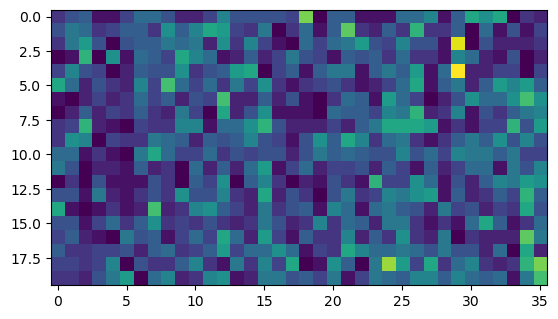

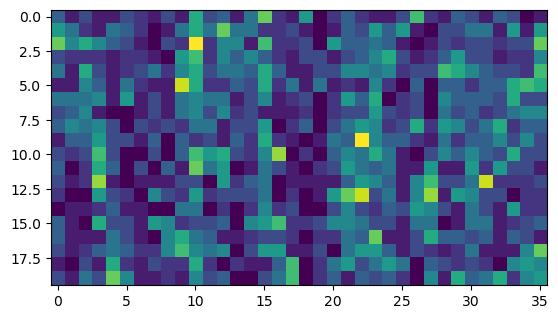

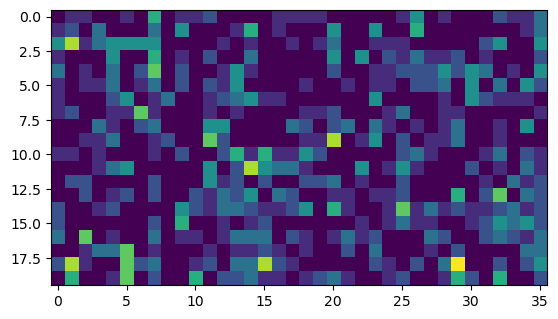

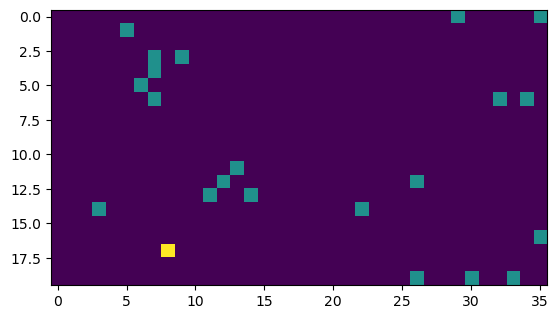

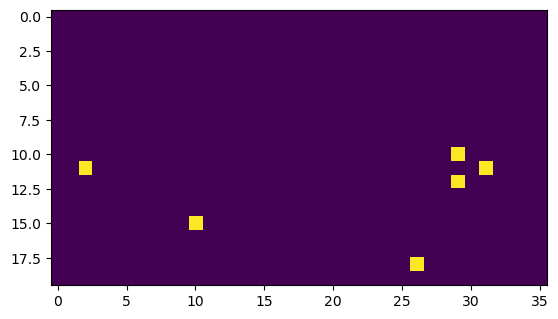

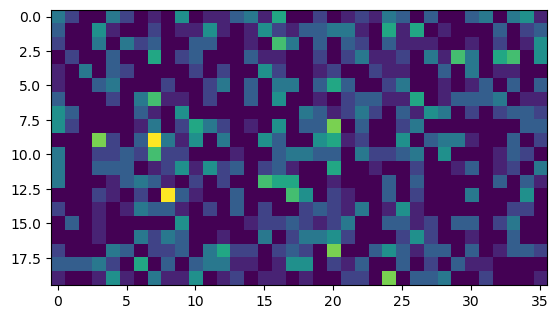

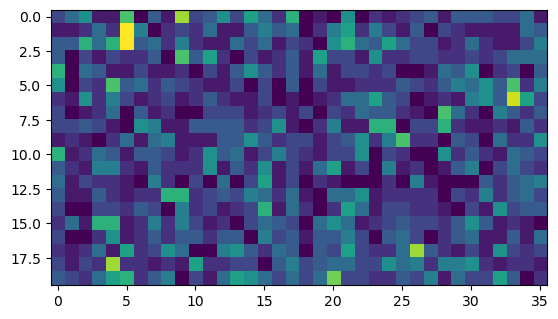

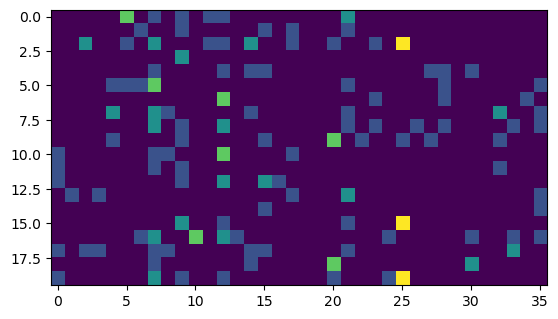

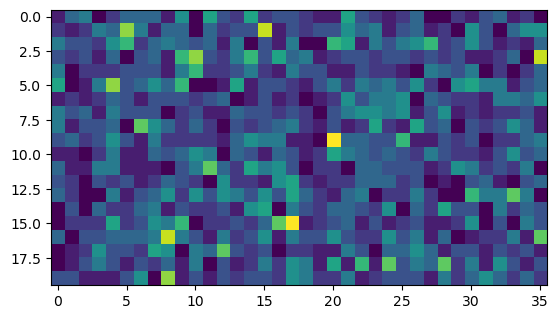

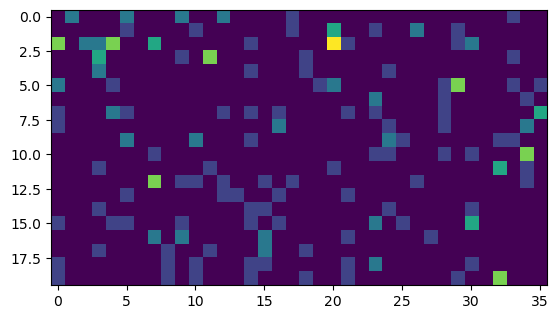

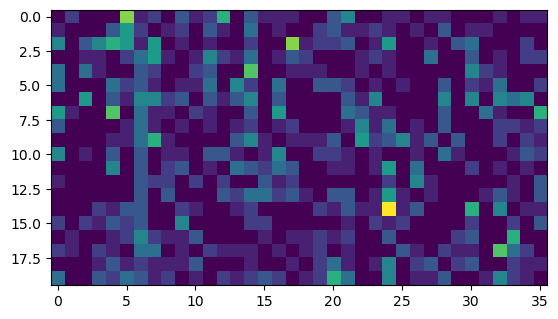

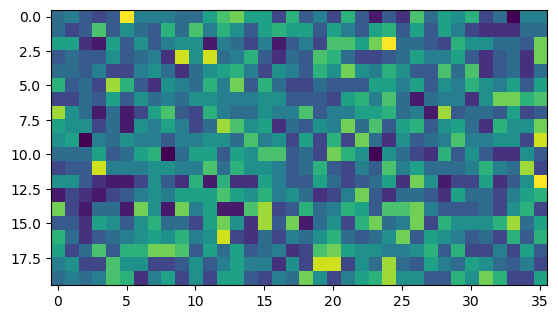

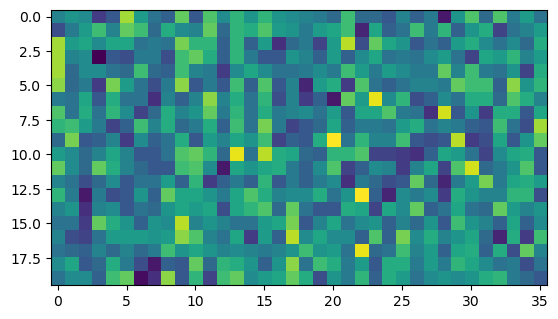

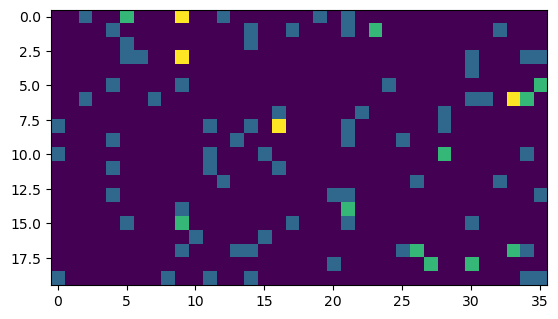

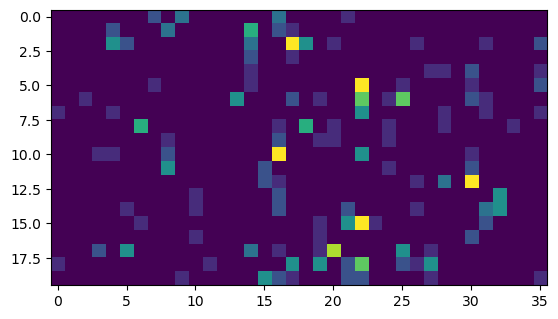

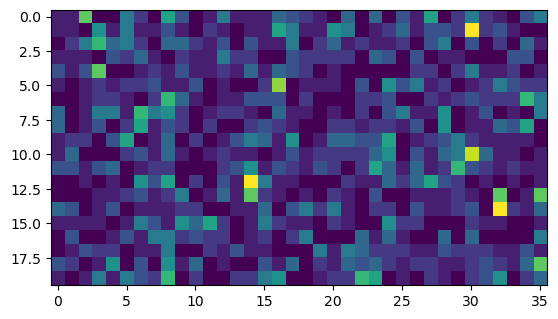

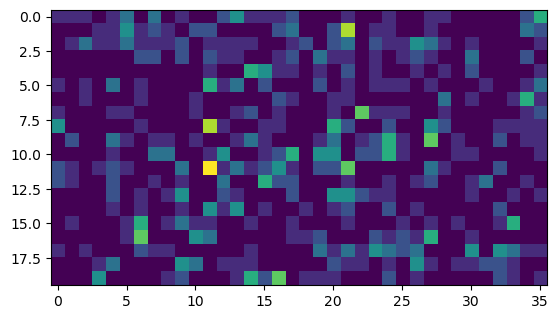

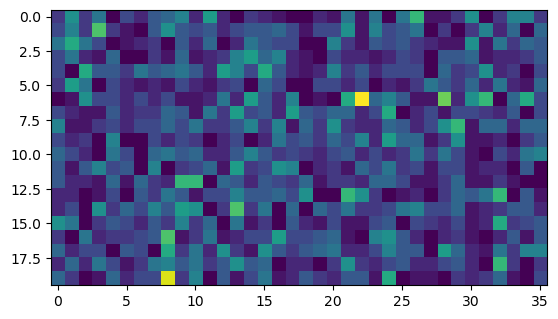

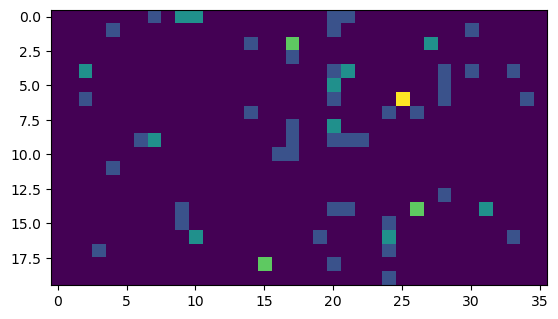

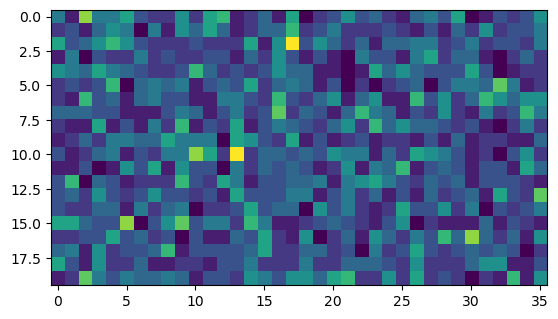

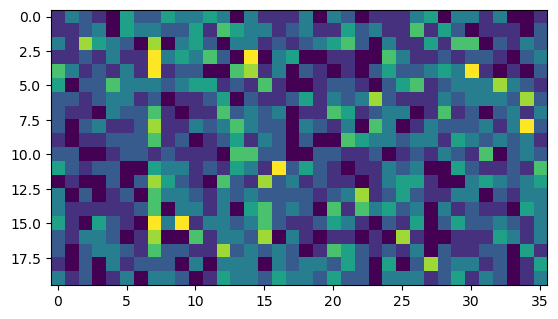

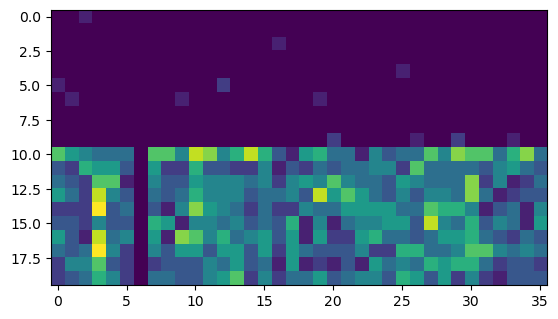

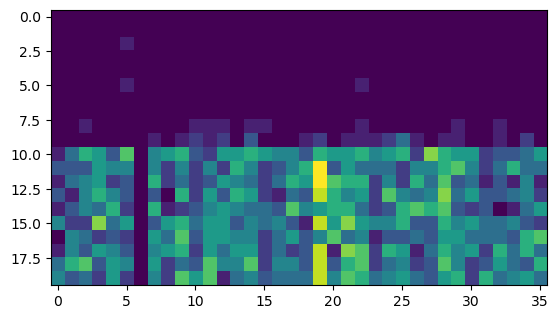

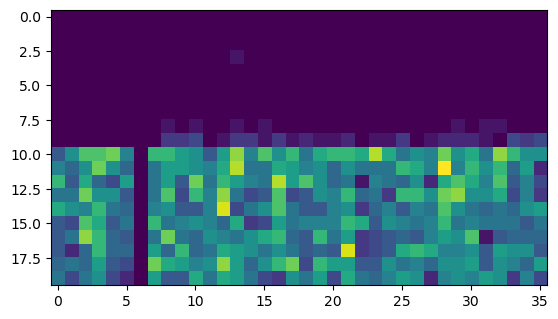

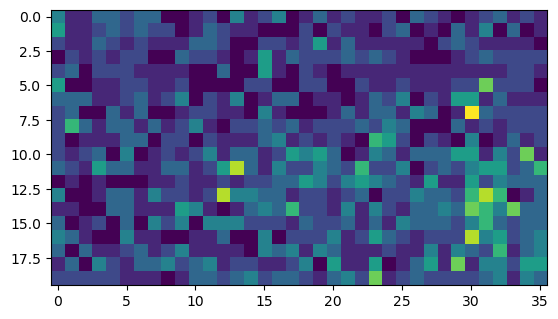

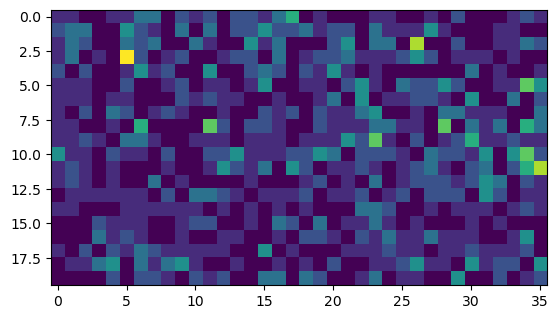

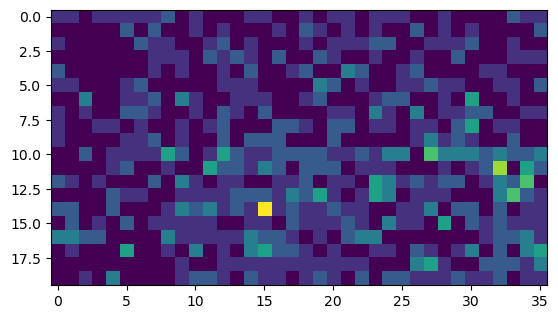

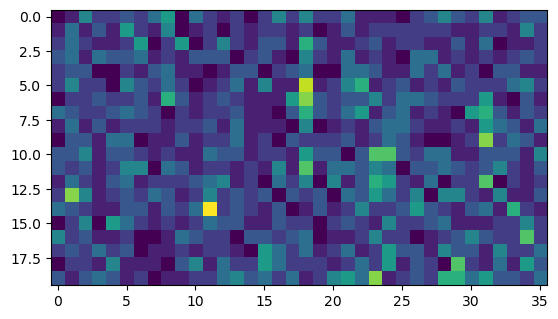

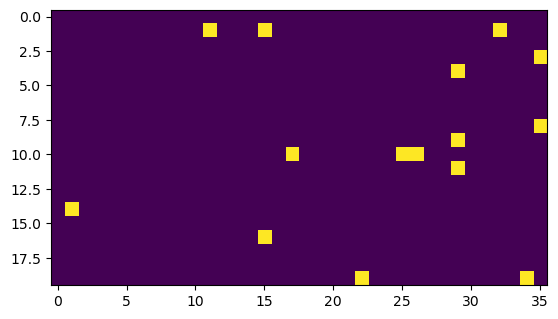

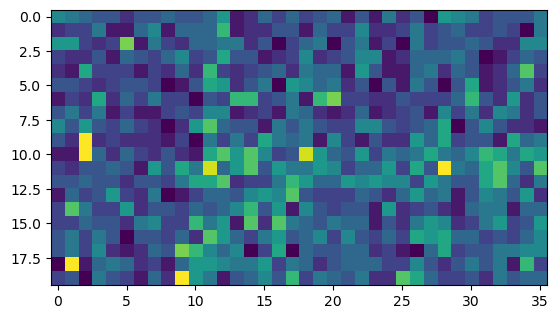

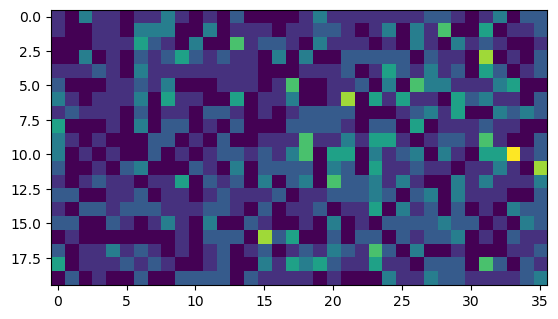

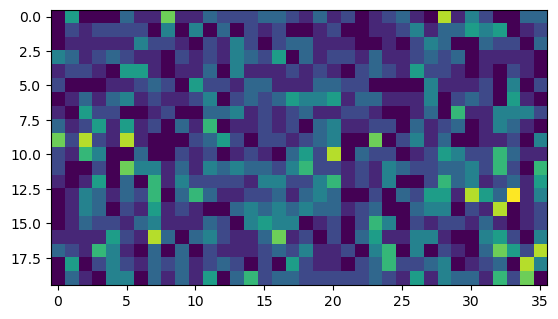

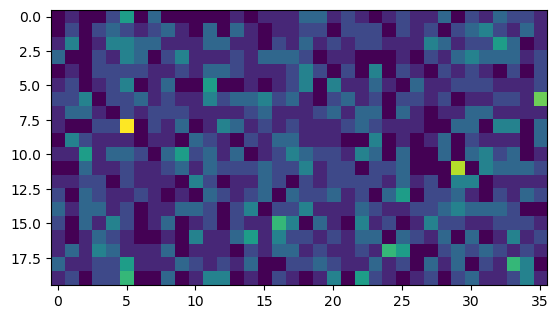

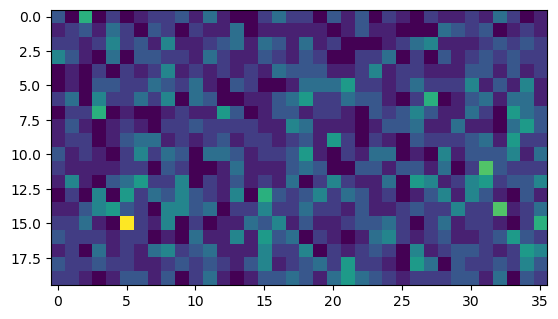

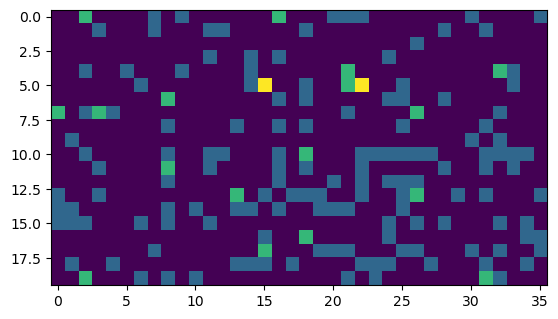

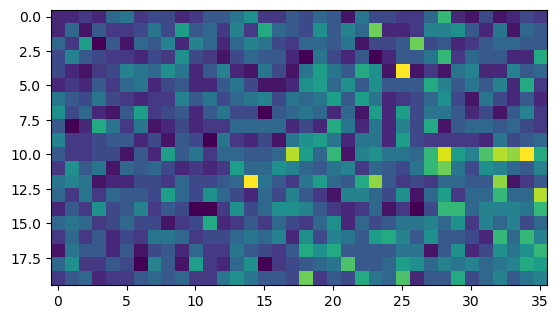

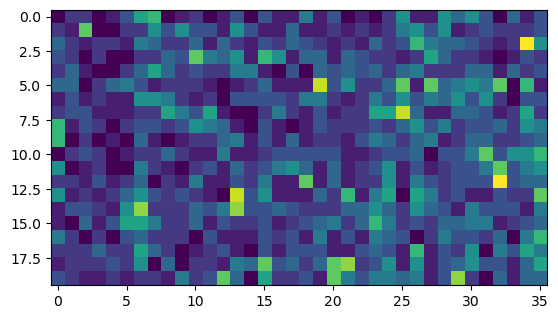

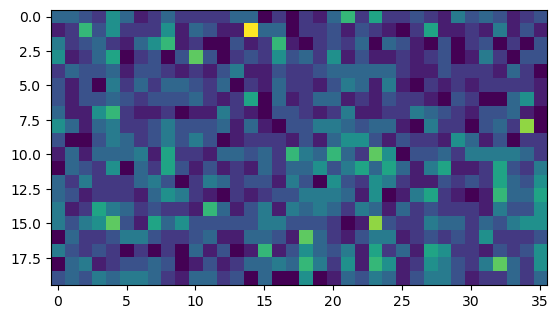

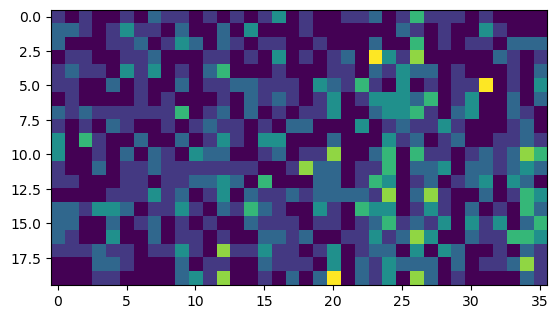

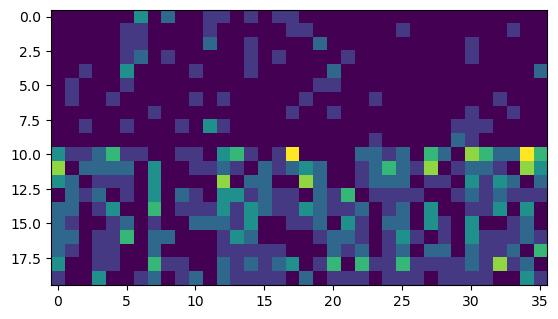

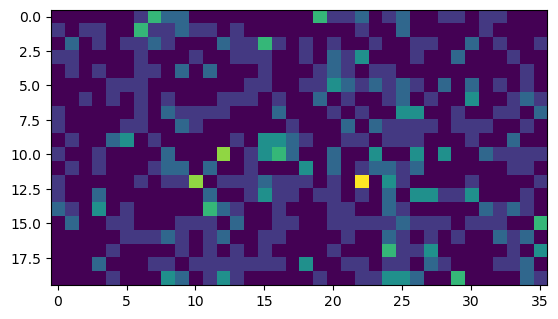

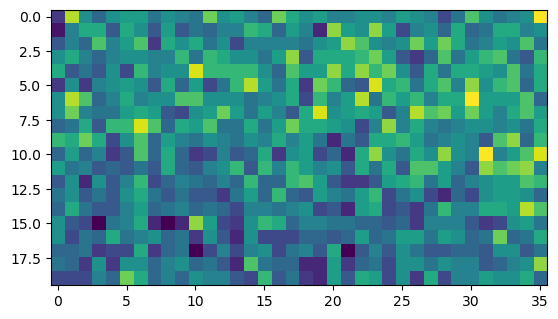

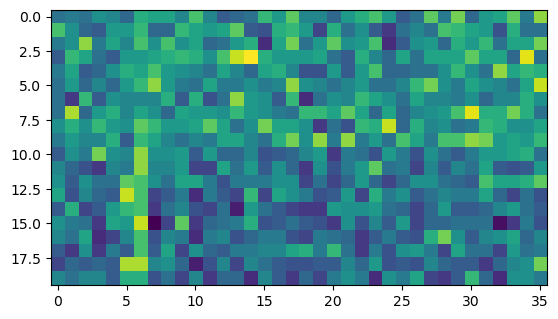

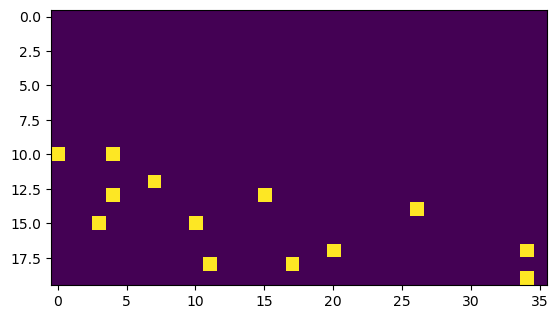

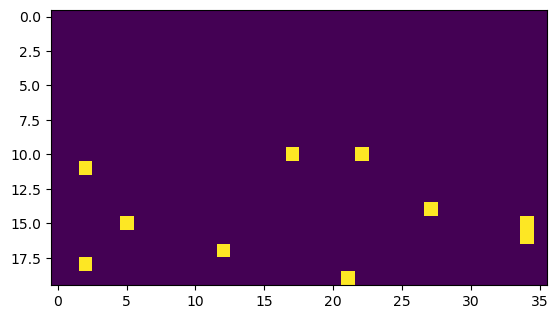

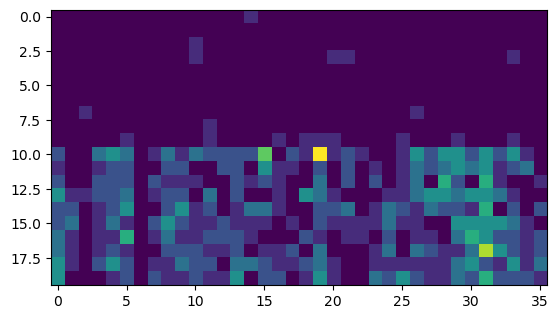

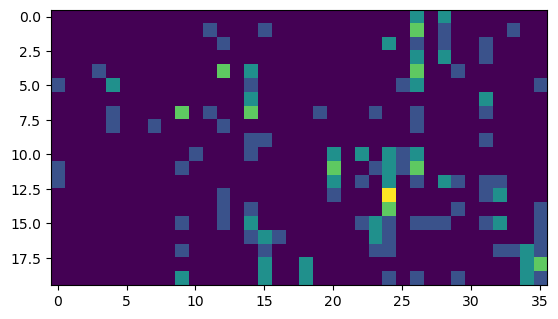

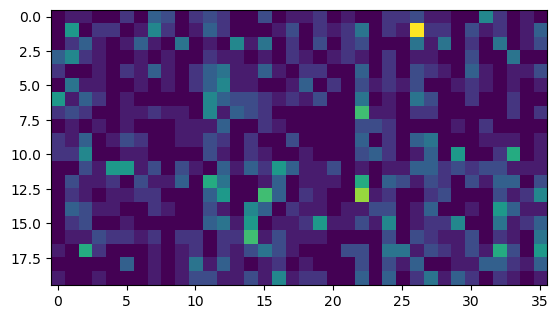

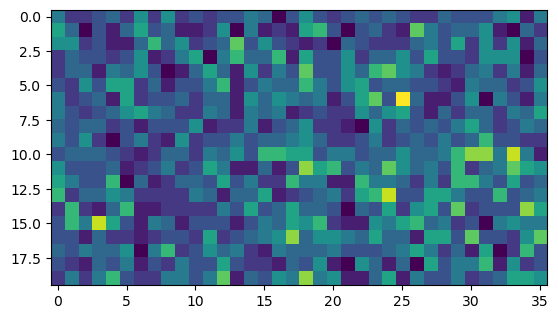

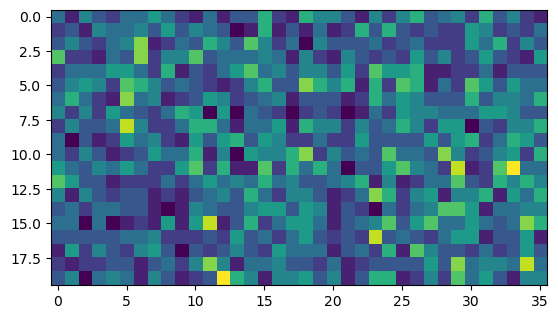

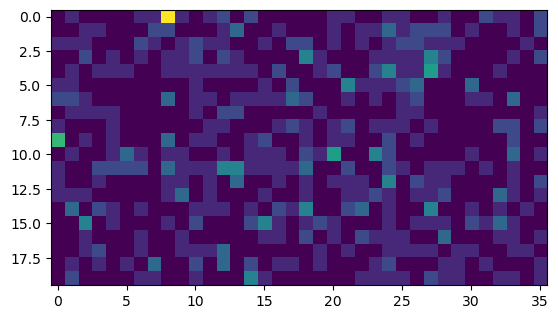

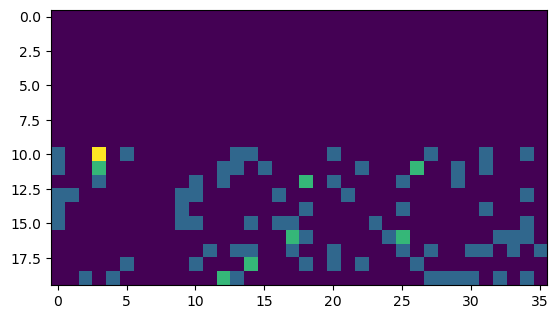

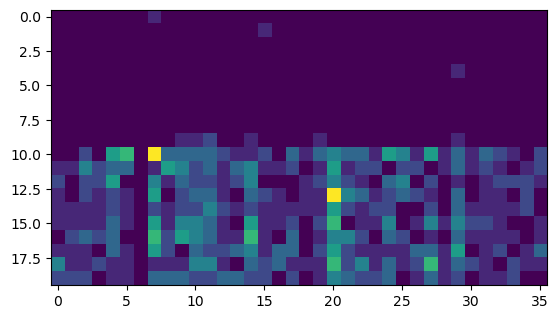

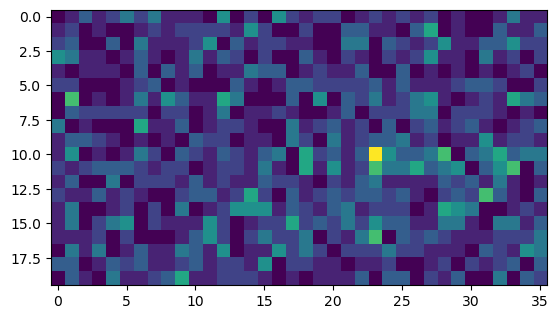

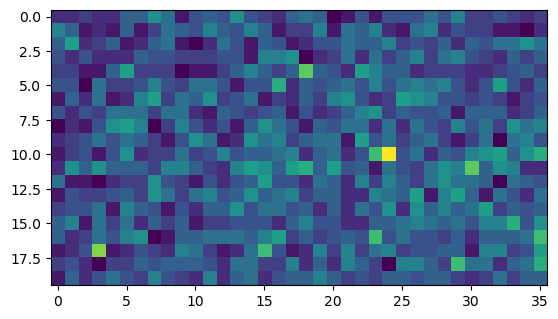

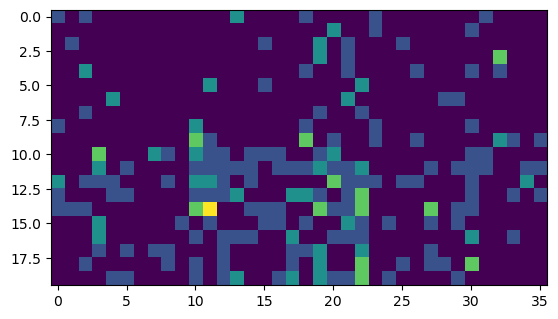

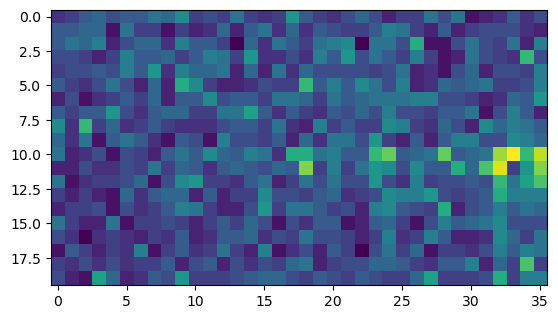

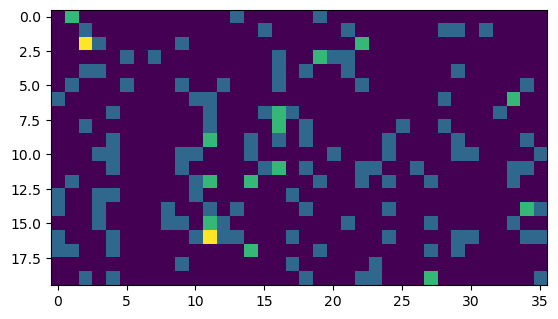

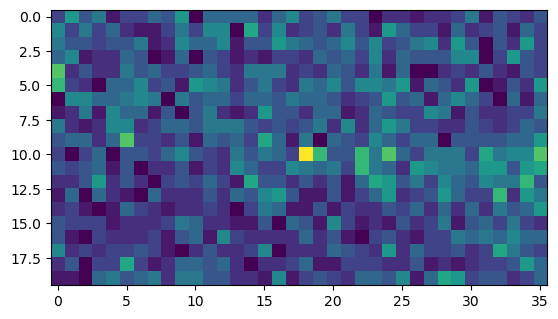

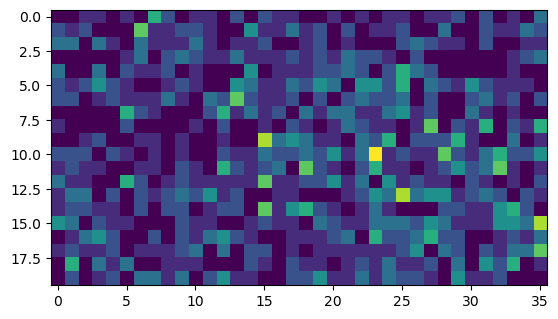

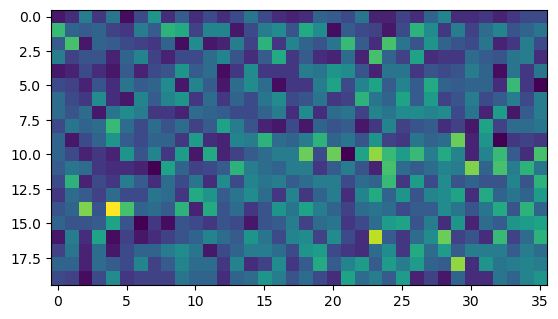

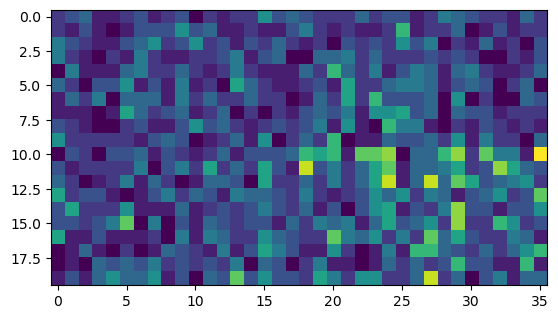

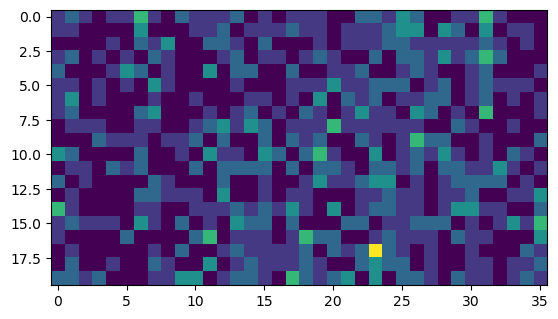

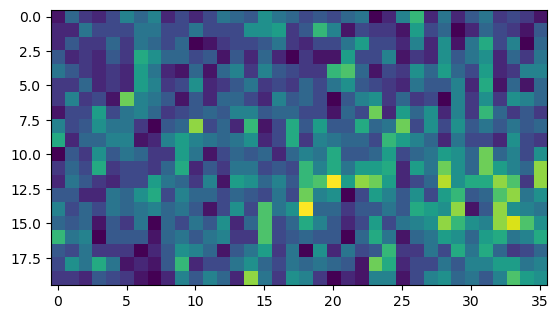

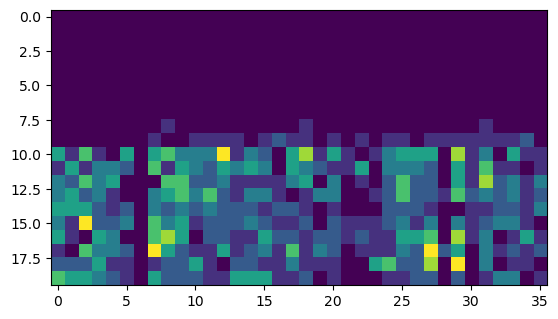

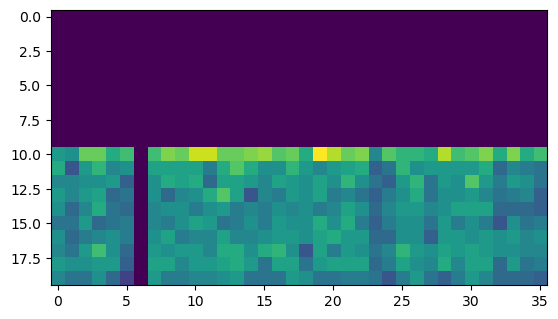

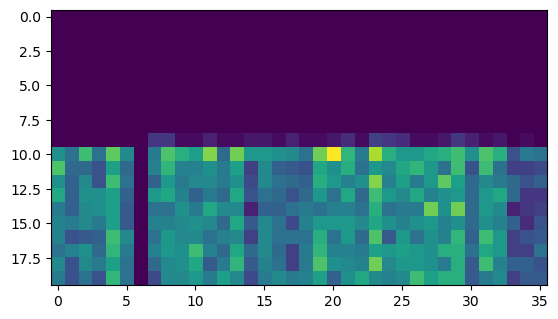

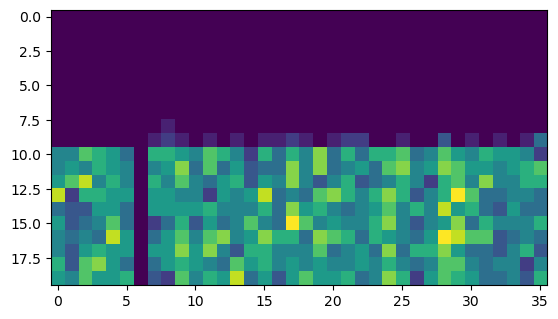

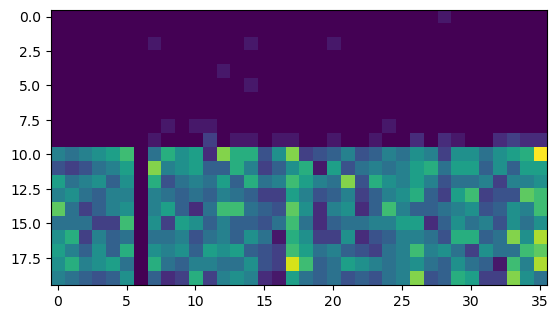

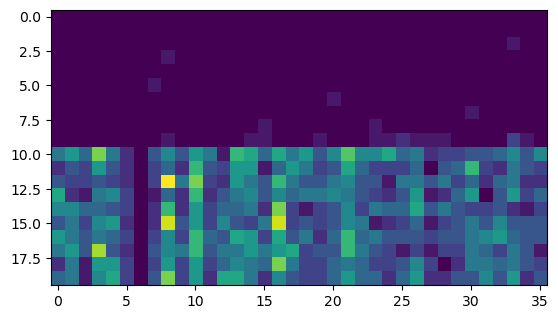

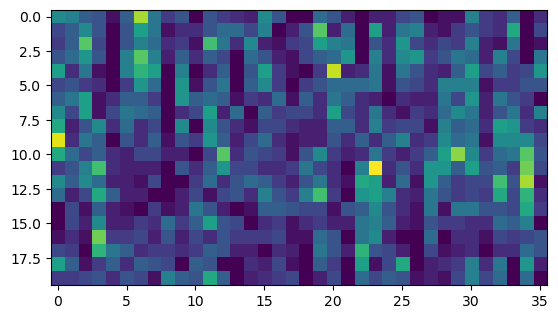

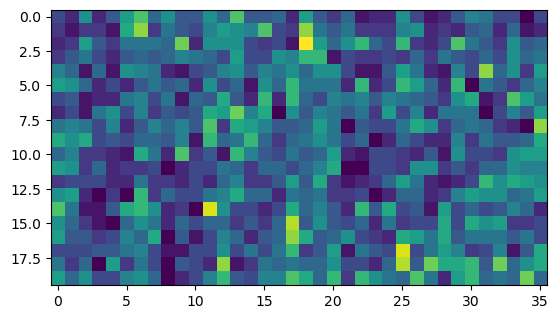

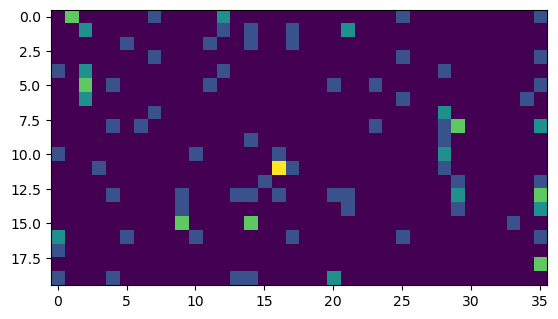

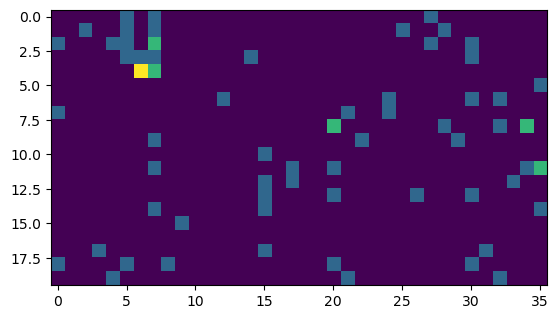

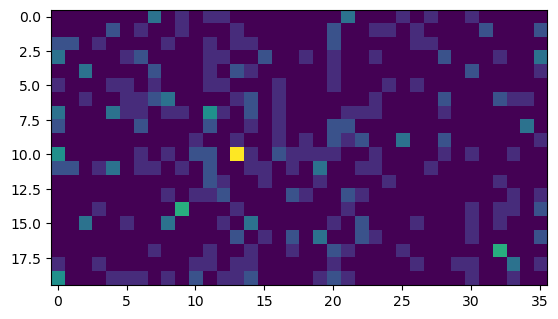

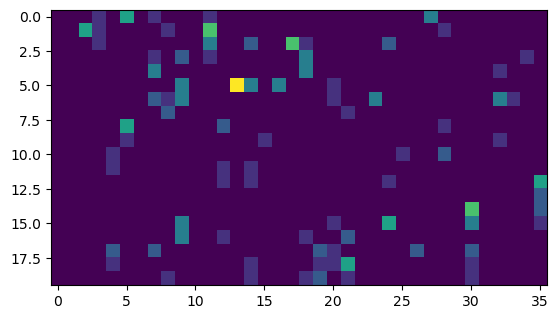

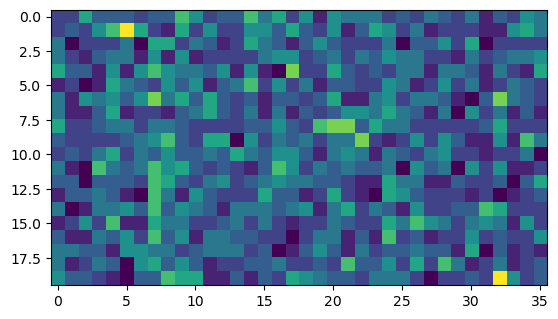

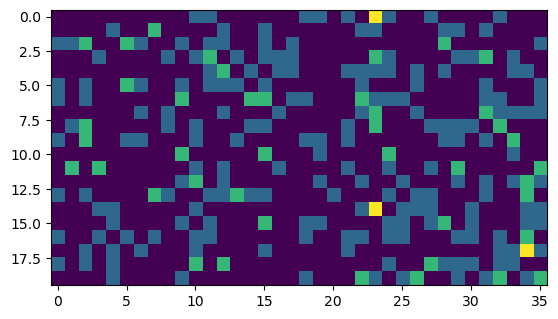

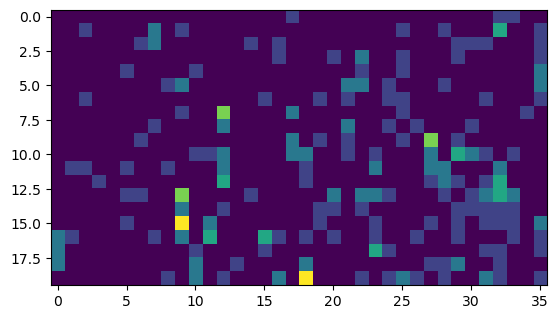

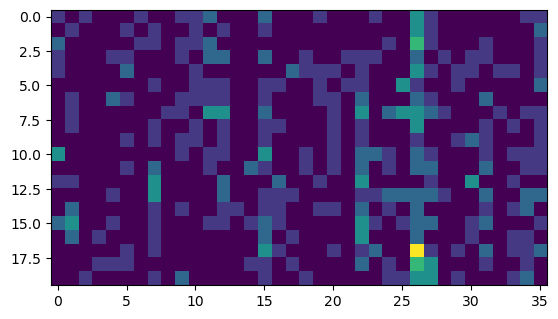

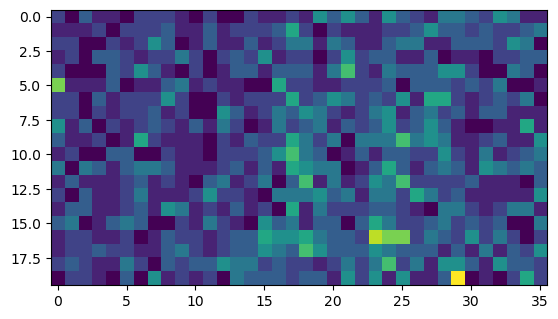

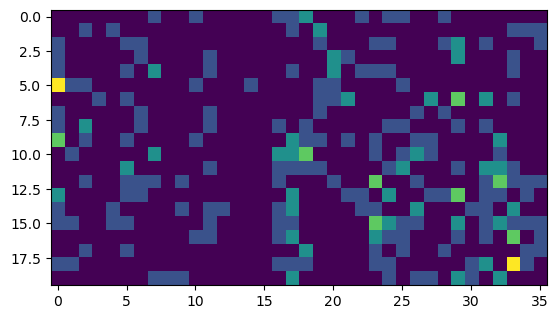

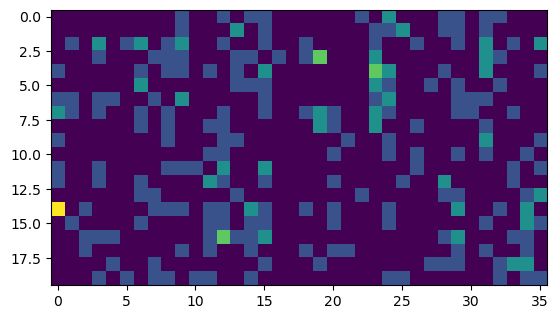

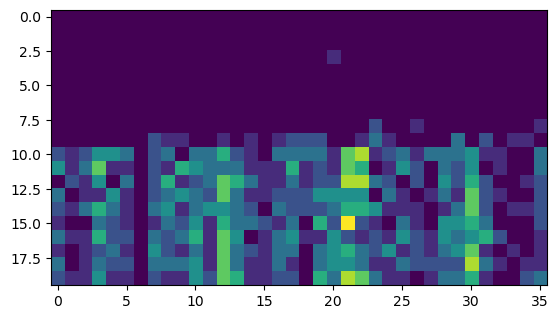

In [95]:
d = np.load('data_50.npy')
avg_d = np.sum(d, axis=3)
d20 = avg_d[:, :, :, 3]
print(d20.shape)
for c in d20:
    plt.imshow(c)
    plt.show()
    plt.close()

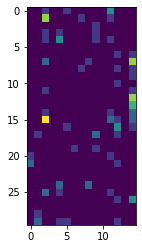

In [10]:
plt.imshow(d[0, :, 0, :, 0])

In [25]:
import matplotlib
# plt.style.use('default')
# datar = np.load('data.npy')
# average_data = np.mean(datar, axis=3)
# names = ['5', '10', '15', '20']

# for idc, cluster in enumerate(average_data[:3]):
#     fig, axs = plt.subplots(1, 5, figsize=(30, 4))
    
#     grids = []
#     for i, intens in enumerate(np.rollaxis(cluster, 2)):
#         grid = np.zeros((9, 9))
#         leds = np.mean(intens[50:, :] - intens[:50, :], axis=0)
#         psth = np.mean(intens, axis=1)
        
#         if i == 3:
#             axs[4].bar(np.arange(len(psth)), psth)
#             axs[4].vlines(50, 0, np.max(psth), color='red')
#             axs[4].spines['top'].set_visible(False)
#             axs[4].spines['right'].set_visible(False)


#         for c, l in zip(coords, leds):
#             grid[c[0], c[1]] = l
#         grids.append(grid)
#         axs[i].imshow(grid, cmap='inferno', vmin=0, vmax=np.max(grid))
#         axs[i].axis('off')
#         axs[i].set_title('{}mW/mm2'.format(names[i]))        
    
#     fig.suptitle('Cluster {}'.format(idc), fontsize=20)
#     plt.tight_layout()
#     plt.show()
#     plt.close()  

plt.style.use('default')
datar = np.load('data_50.npy')
average_data = np.mean(datar, axis=3)
names = ['5', '10', '15', '20']

for idc, cluster in enumerate(average_data):
    fig, axs = plt.subplots(2, 4, figsize=(20, 10))
    
    grids = []
    for i, intens in enumerate(np.rollaxis(cluster, 2)):
        grid = np.zeros((9, 9))
        leds = np.sum(intens[10:, :] - intens[:10, :], axis=0)
        psth = np.sum(intens, axis=1)
        
        axs[1, i].bar(np.arange(len(psth)), psth)
        axs[1, i].vlines(10, 0, np.max(psth), color='red')
        axs[1, i].spines['top'].set_visible(False)
        axs[1, i].spines['right'].set_visible(False)
        axs[1, i].set_xticks([0, 4, 8, 12, 16, 20])
        axs[1, i].set_xticklabels(['-500', '-300', '-100', '100', '300', '500'])
        axs[1, i].set_xlabel('Time from stimulus (ms)')
        axs[1, i].set_ylabel('Spike Count')


        for c, l in zip(coords, leds):
            grid[c[0], c[1]] = l
        grids.append(grid)
    
    for i, grid in enumerate(grids):
        im = axs[0, i].imshow(grid, cmap='plasma', vmin=0, vmax=np.max(grids))
        axs[0, i].axis('off')
        axs[0, i].set_title('{}mW/mm2'.format(names[i]), fontsize=16)        
    

    cbar = plt.colorbar(im, ax=axs.ravel().tolist(), shrink=0.35, anchor=(0, 0.92))
    cbar.set_label(label='(stim - baseline) spike count', fontsize=12)
    fig.suptitle('Cluster {}'.format(idc), fontsize=20)
    plt.savefig('Figures/complete_panel_{}.png'.format(idc))
    #plt.show()
    plt.close()  


    

In [ ]:
# Structure of array is dict[stim_number][presentation_number] containg a number_of_cluster * spikes matrix
baselines = {}
for i, ttl in enumerate(first_ttls):
    spikes = sp_times[sp_times > ttl - 10000]
    spikes = spikes[spikes < ttl]

    baselines[i] = [(np.intersect1d(sp_times[idx_clu], spikes) - ttl)/20 for idx_clu in idxs_clu]

print(len(baselines))


2160


In [ ]:
# Averageover all presentations
n_pres = 15
n_stim_pre_pres = 144
n_chan = 65

mean_pres = {}
for i in range(n_stim_pre_pres):
    mean_pres[i] = {}
    for chan in range(n_chan):
        mean_pres[i][chan] = np.array([])


for p in range(n_pres):
    for s in range(n_stim_pre_pres):
        for chan in range(len(presentation[0])):
            mean_pres[s][chan] = np.append(mean_pres[s][chan], presentation[p*144+s][chan])

KeyError: 65

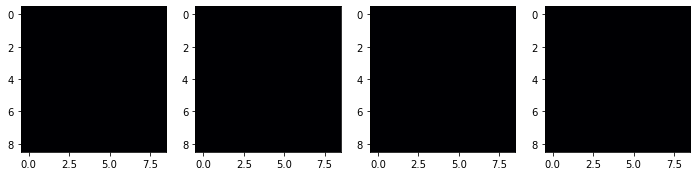

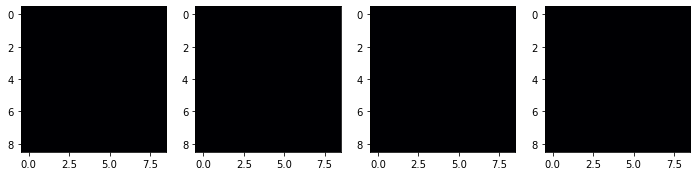

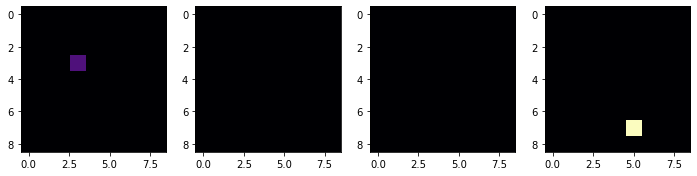

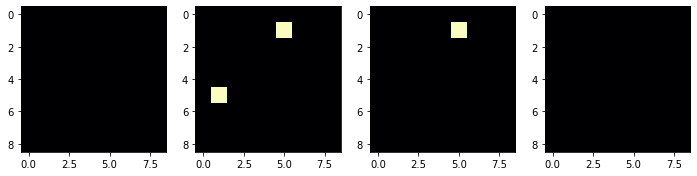

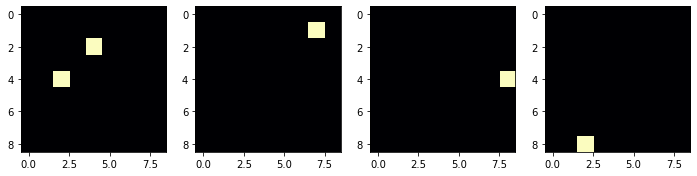

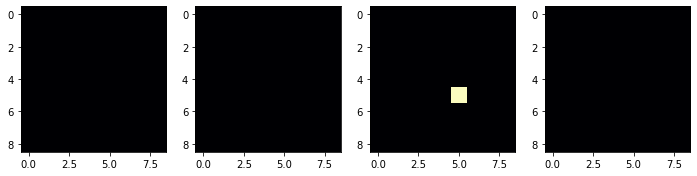

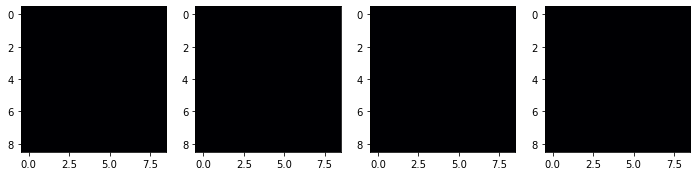

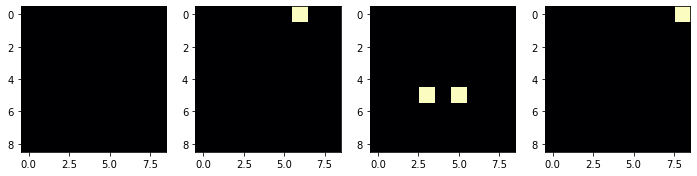

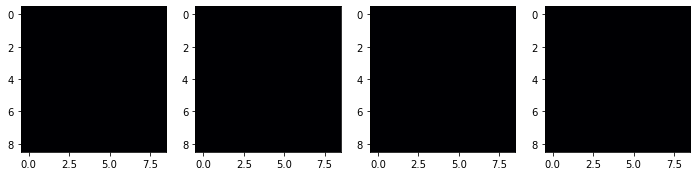

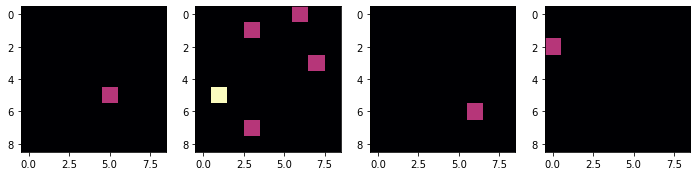

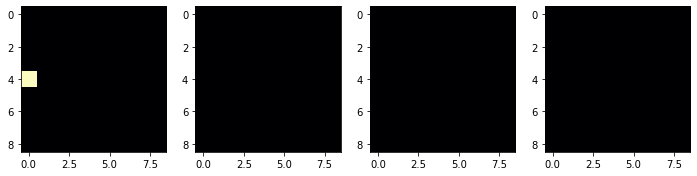

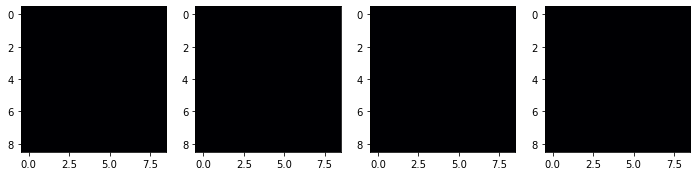

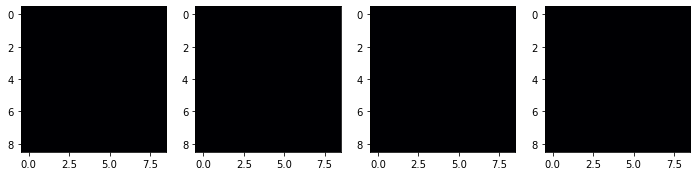

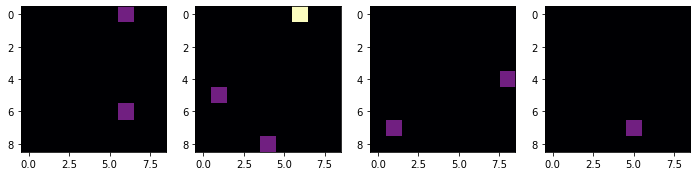

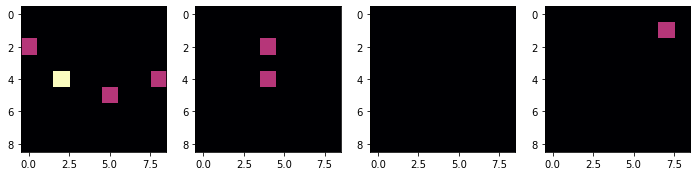

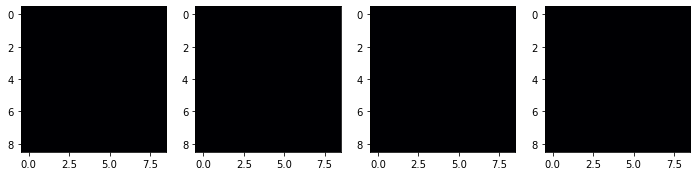

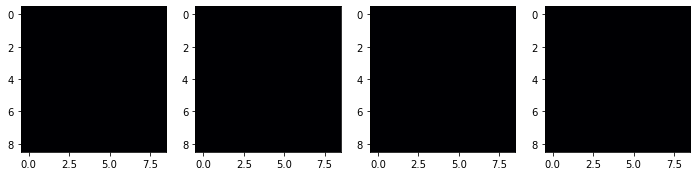

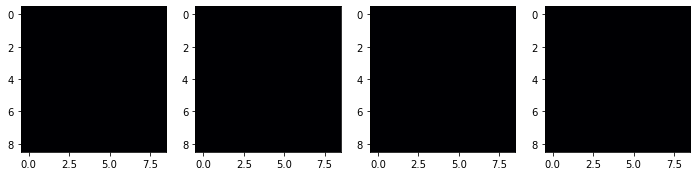

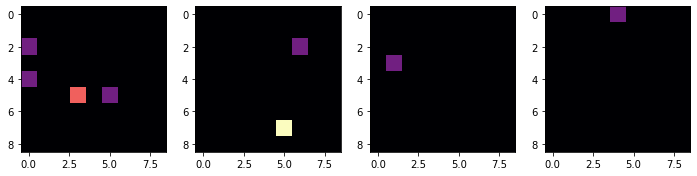

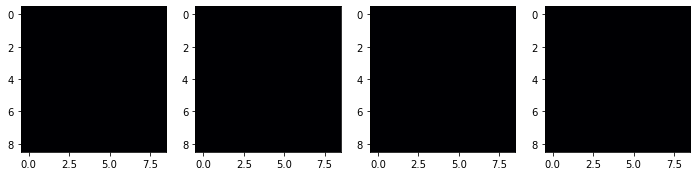

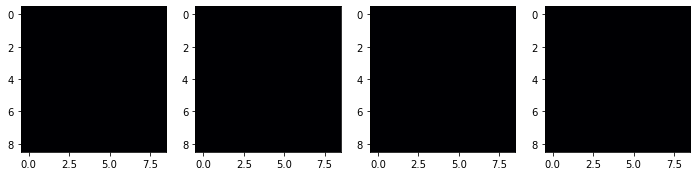

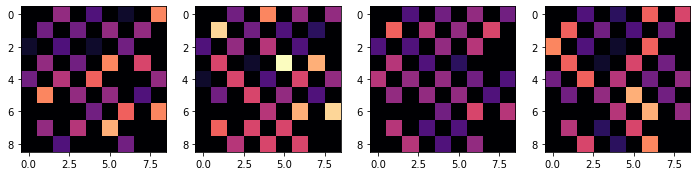

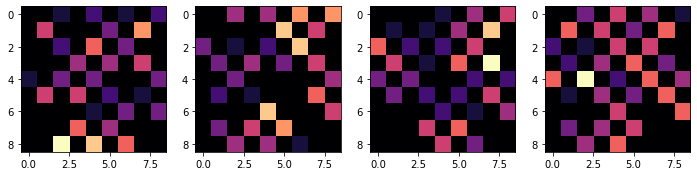

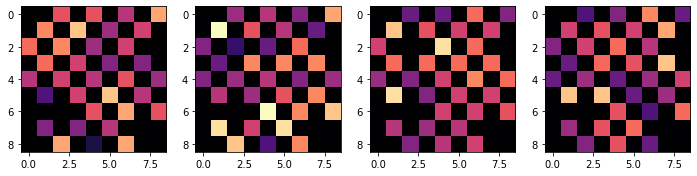

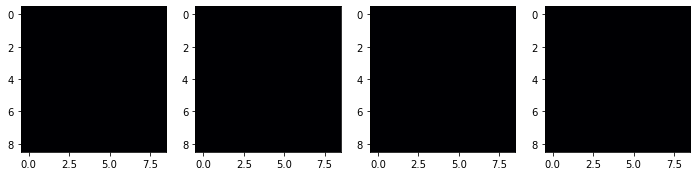

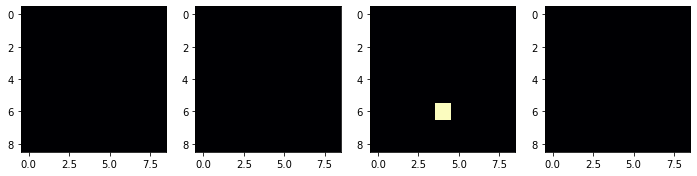

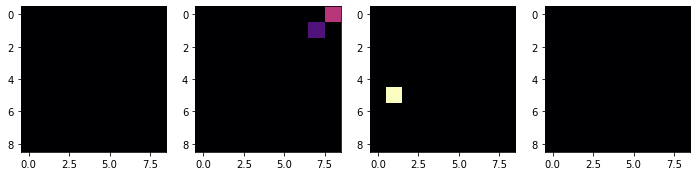

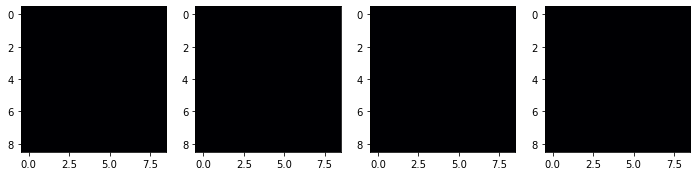

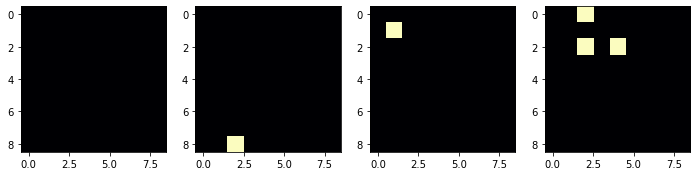

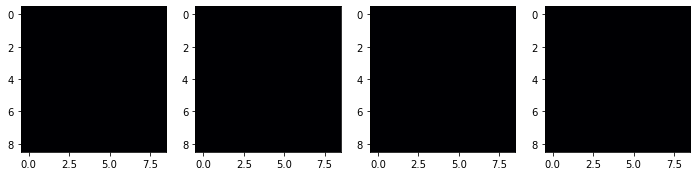

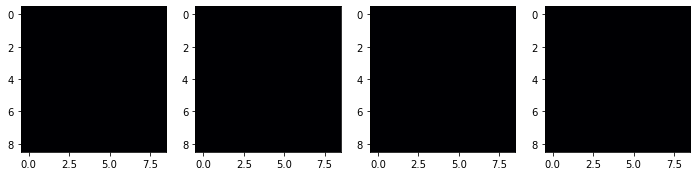

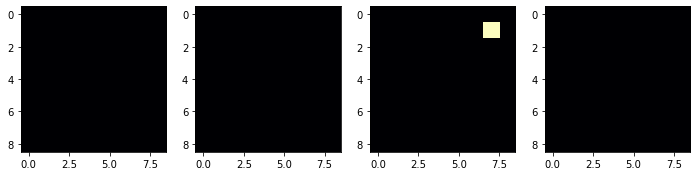

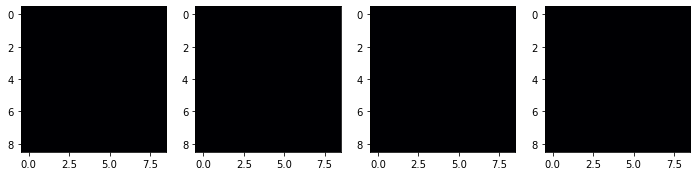

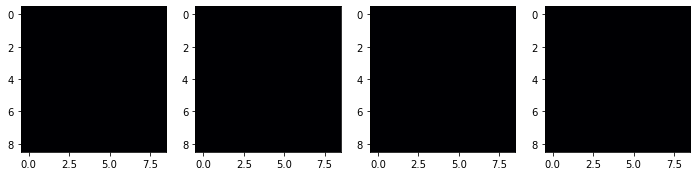

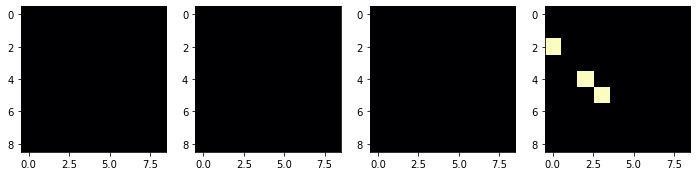

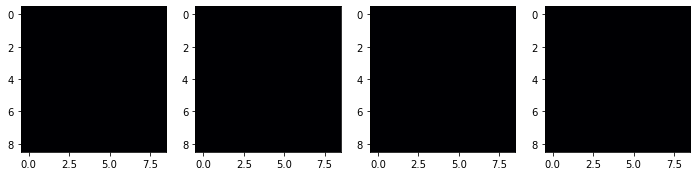

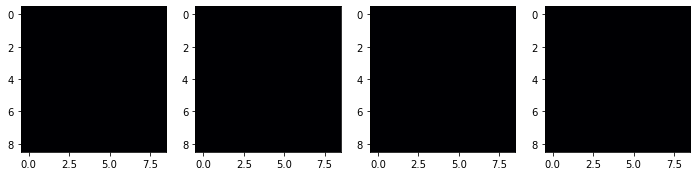

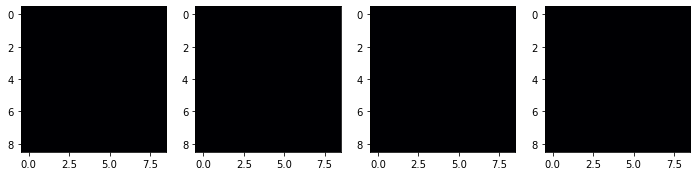

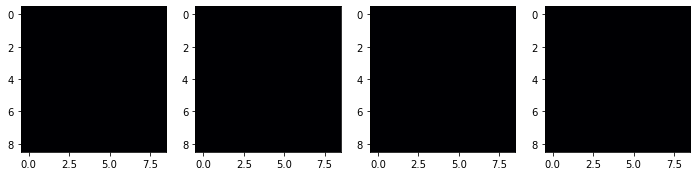

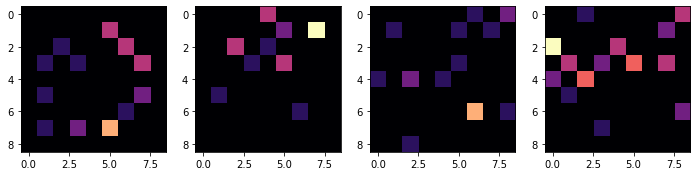

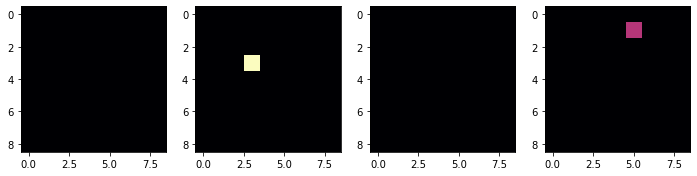

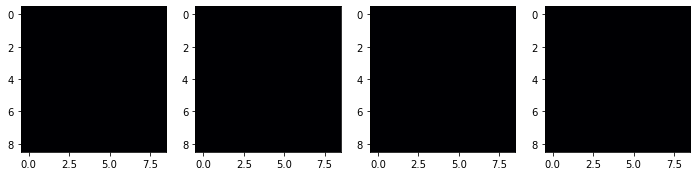

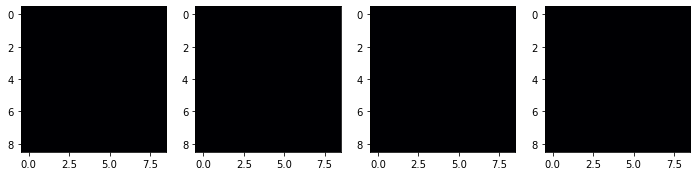

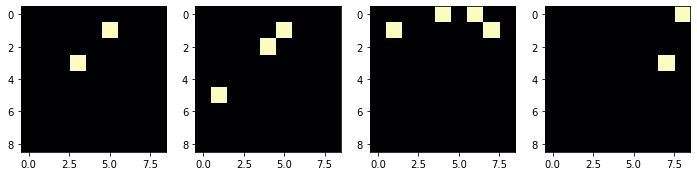

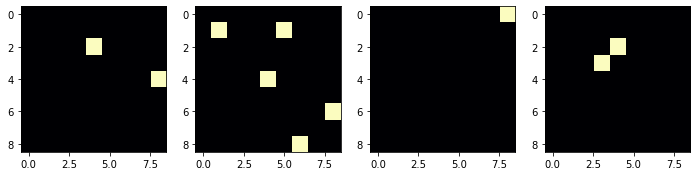

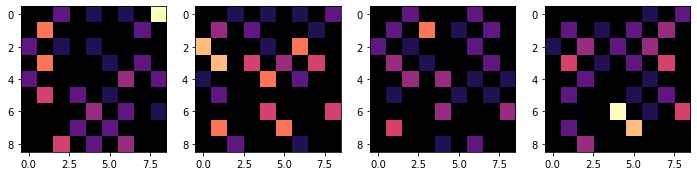

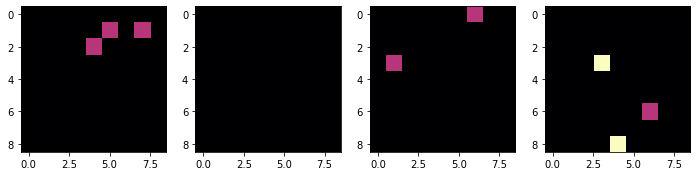

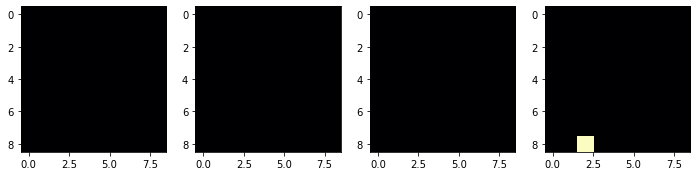

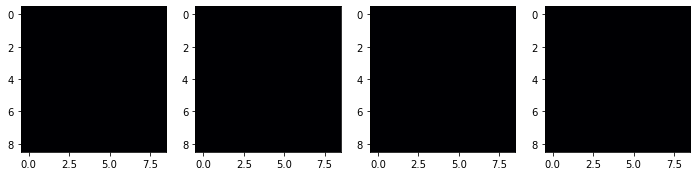

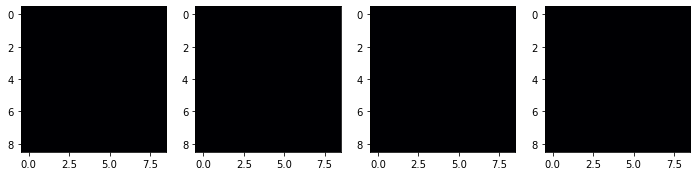

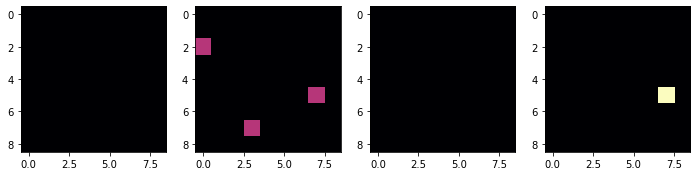

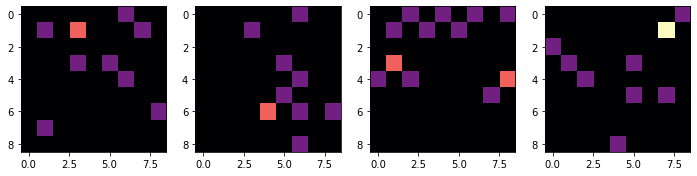

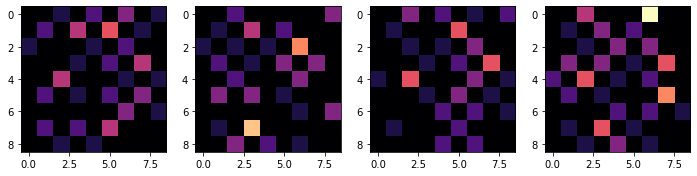

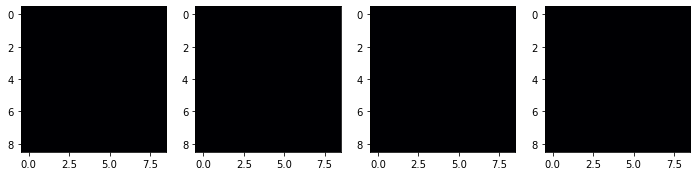

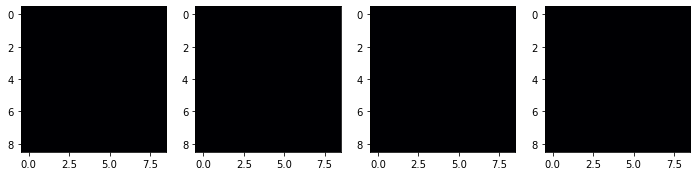

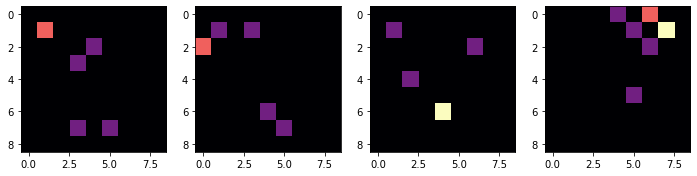

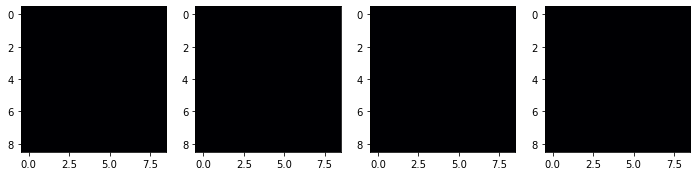

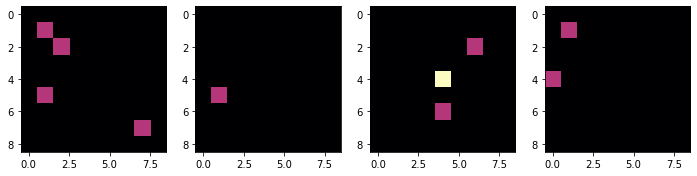

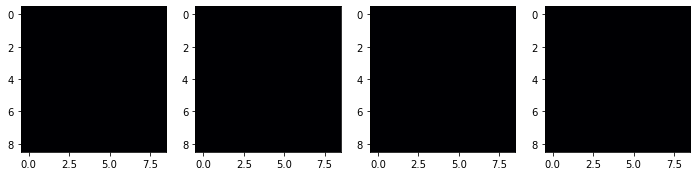

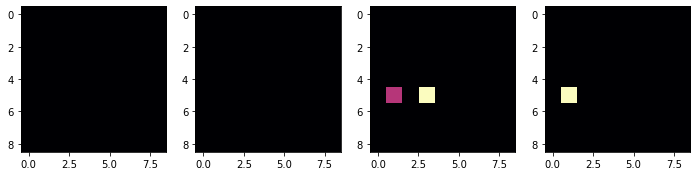

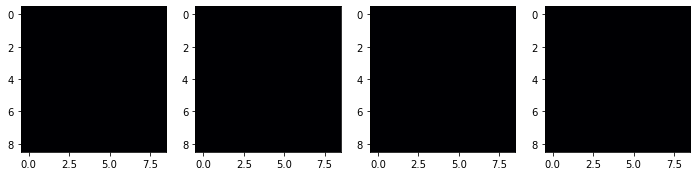

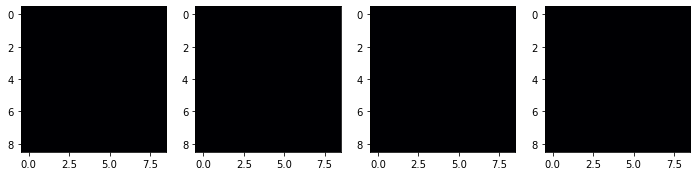

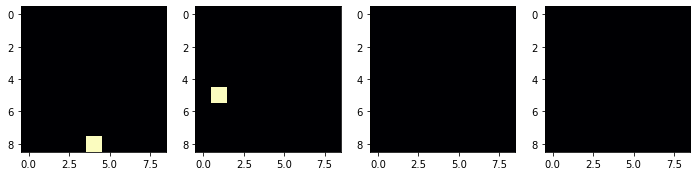

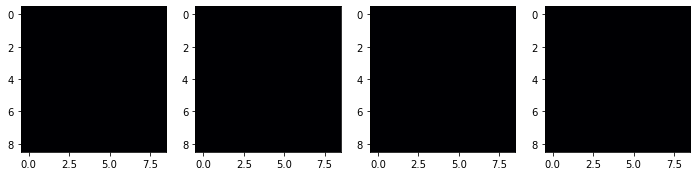

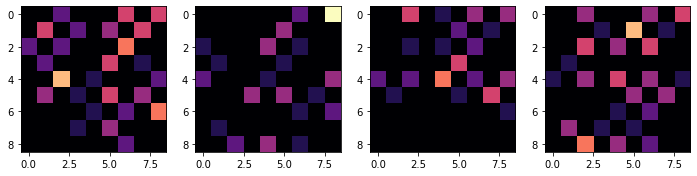

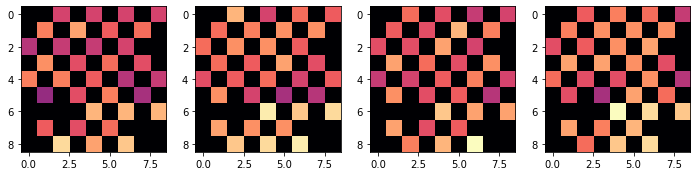

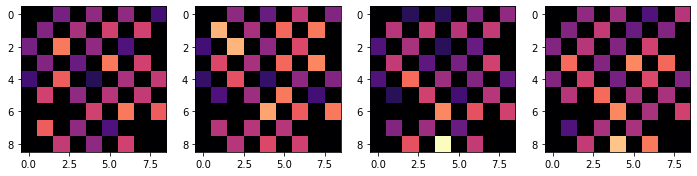

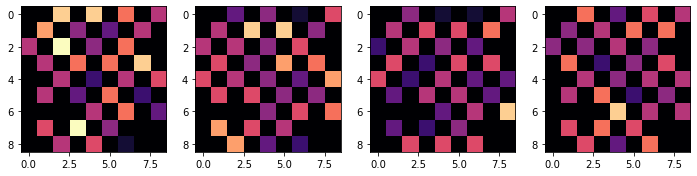

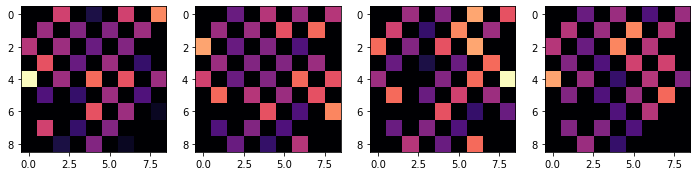

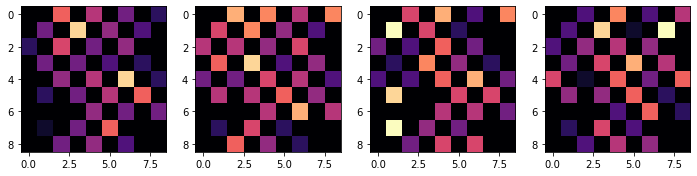

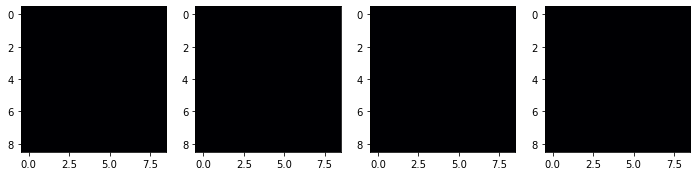

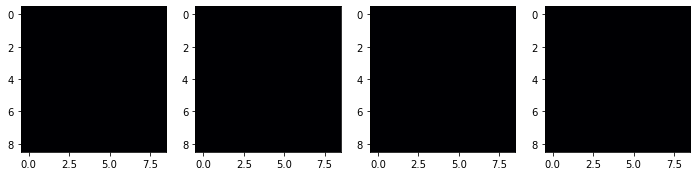

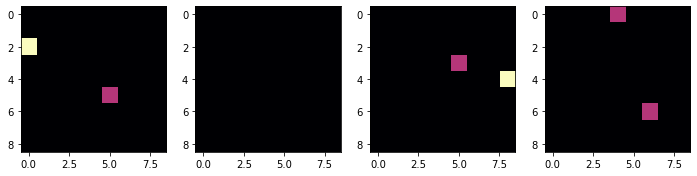

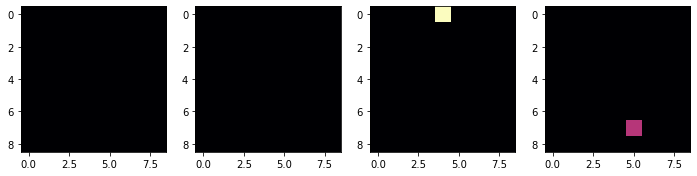

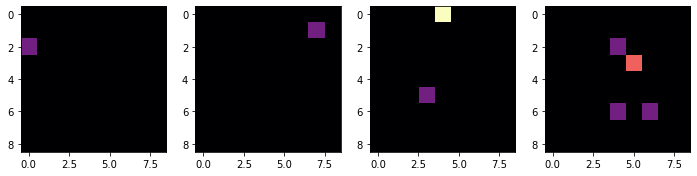

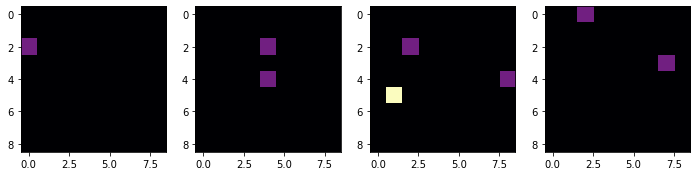

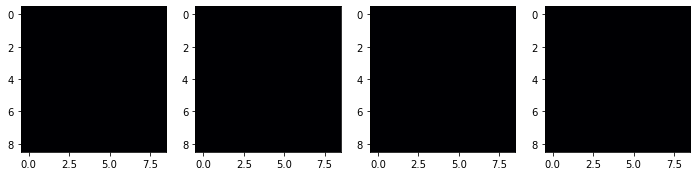

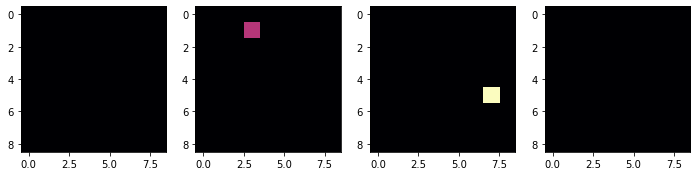

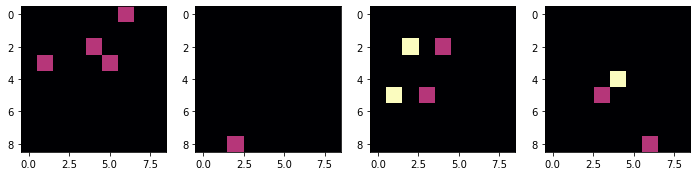

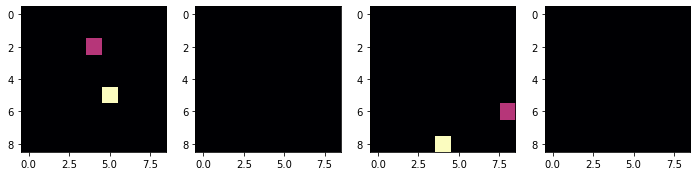

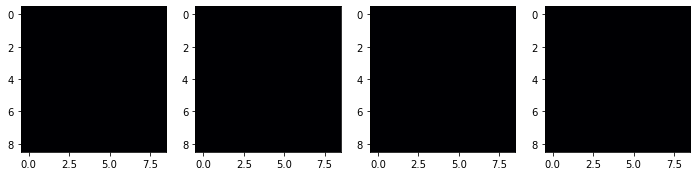

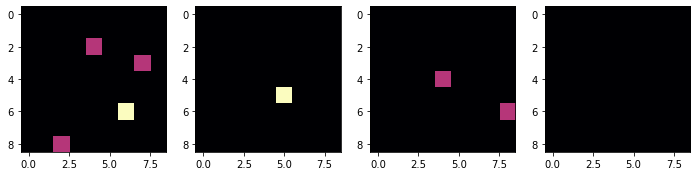

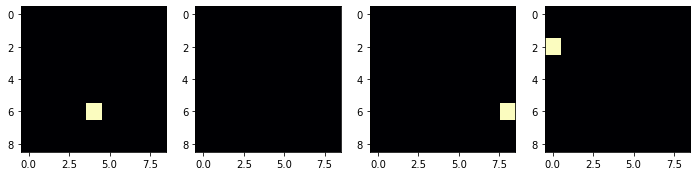

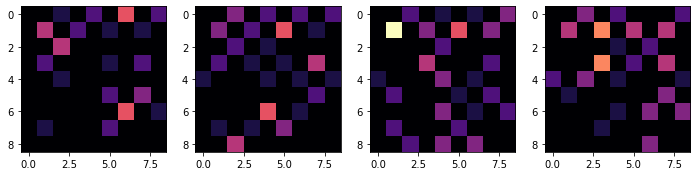

In [ ]:
int_5 = np.arange(0, 2160, 4)
int_10 = np.arange(1, 2160, 4)
int_15 = np.arange(2, 2160, 4)
int_20 = np.arange(3, 2160, 4)

for chan in range(84):
    fig, axs = plt.subplots(1, 4, figsize=(12, 4))
    actis = []
    for i, intensity in enumerate([int_5, int_10, int_15, int_20]):
        leds_b, leds = [], []
        array_leds, array_leds_b = np.zeros((9, 9)), np.zeros((9, 9))
        for led in intensity:
            leds.append(len(presentation[led][chan]))
            leds_b.append(len(baselines[led][chan]))
    
        leds = np.array(leds).reshape(15, 36)
        leds_b = np.array(leds_b).reshape(15, 36)

        leds = np.mean(leds, axis=0)
        leds_b = np.mean(leds_b, axis=0)

        for l, c in zip(leds, coords):
            array_leds[c[0], c[1]] = l
        
        for l, c in zip(leds_b, coords):
            array_leds_b[c[0], c[1]] = l


        actis.append((array_leds - array_leds_b).reshape(9, 9))
    actimax = np.max(actis)
    axs[0].imshow(actis[0], vmin=0, vmax=actimax, cmap='magma')
    axs[1].imshow(actis[1], vmin=0, vmax=actimax, cmap='magma')
    axs[2].imshow(actis[2], vmin=0, vmax=actimax, cmap='magma')
    axs[3].imshow(actis[3], vmin=0, vmax=actimax, cmap='magma')

    plt.show()
    plt.close()

In [ ]:
# Faire PSTH sur les canaux intéressant. pour toutes les leds, tous les points

In [ ]:
channel = 64
int_5 = np.arange(0, 2160, 4)
int_10 = np.arange(1, 2160, 4)
int_15 = np.arange(2, 2160, 4)
int_20 = np.arange(3, 2160, 4)

# Courbe temps d'activation en fonction du temps avec binnage de 25 ms

for i, intensity in enumerate([int_5, int_10, int_15, int_20]):
    leds = []
    array_leds, array_leds_b = np.zeros((9, 9)), np.zeros((9, 9))
    for led in intensity:
        print(presentation[led][64])


[24.85]
[]
[24.5]
[25.05]
[]
[26.65]
[]
[]
[25.4]
[25.3]
[]
[26.45]
[25.65]
[]
[]
[24.95]
[25.15]
[24.7]
[24.8]
[25.]
[24.25]
[25.55]
[]
[]
[24.5]
[]
[25.3]
[25.]
[]
[]
[27.3]
[]
[]
[24.5]
[24.9]
[24.95]
[25.2]
[25.]
[25.6]
[25.3]
[]
[25.15]
[]
[24.9]
[24.75]
[]
[]
[24.2]
[25.45]
[24.95]
[24.95]
[25.3]
[25.9]
[25.6]
[25.1]
[]
[]
[24.95]
[24.6]
[]
[24.9]
[24.8]
[25.3]
[25.15]
[]
[24.65]
[]
[24.9]
[25.2]
[24.25]
[24.85]
[26.15]
[]
[25.5]
[24.6]
[25.45]
[25.45]
[24.7]
[]
[25.3]
[25.55]
[24.95]
[24.4]
[]
[25.55]
[]
[24.3]
[25.45]
[25.4]
[25.2]
[24.9]
[24.5]
[]
[25.6]
[24.95]
[24.7]
[25.1]
[]
[]
[]
[24.55]
[]
[]
[]
[25.1]
[]
[25.]
[]
[26.5]
[25.05]
[25.3]
[25.45]
[24.65]
[]
[]
[]
[25.25]
[25.25 25.3 ]
[25.1]
[24.45]
[]
[24.75]
[26.5]
[24.55]
[25.1]
[27.5]
[24.85]
[24.65]
[24.55]
[]
[25.]
[ 0.15 24.65]
[24.8]
[]
[]
[ 0.3  25.15]
[25.3]
[24.45]
[24.85]
[24.6]
[25.75]
[24.6]
[]
[25.95]
[]
[25.25]
[]
[24.75]
[ 0.35 49.9 ]
[ 0.25 24.65]
[]
[25.7]
[24.7]
[25.25]
[24.95]
[]
[25.35]
[24.9]
[ 0.35 2

In [ ]:
# Regarder par channel +++ car sinon les différences de spiking entre les sites de recording vont moyennes les rations d'upspiking

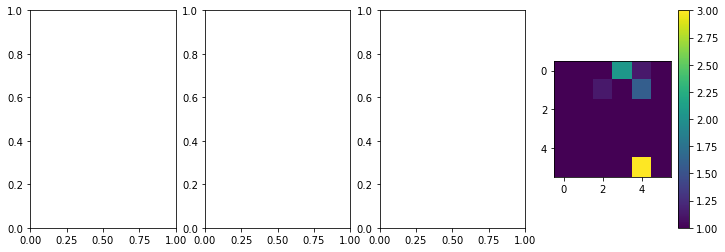

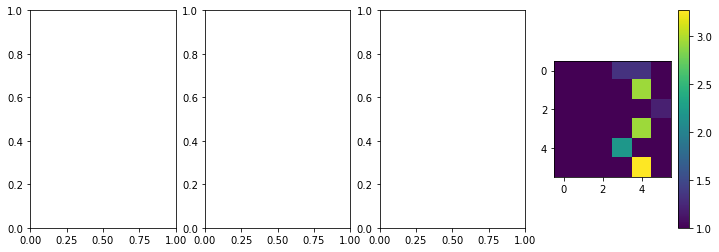

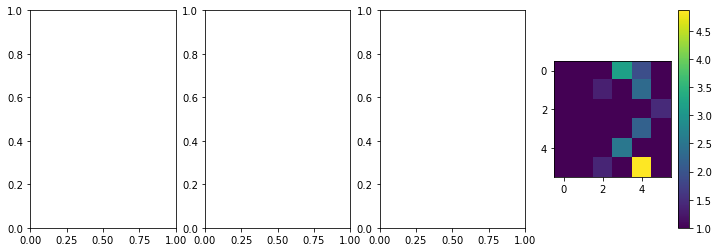

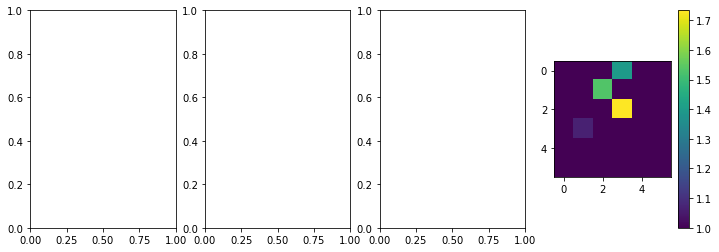

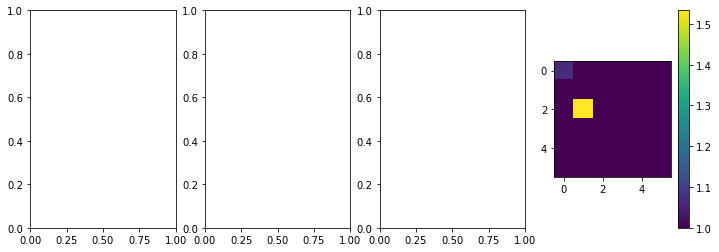

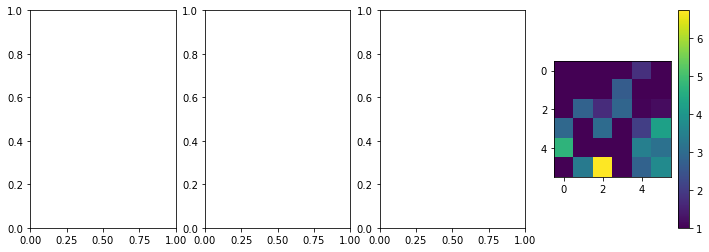

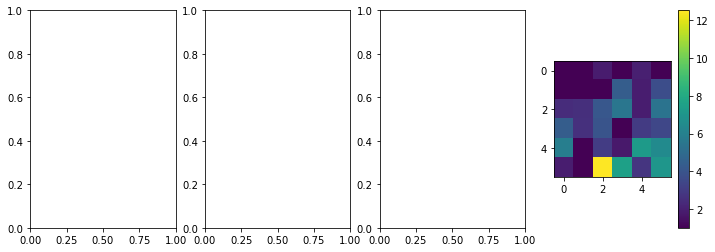

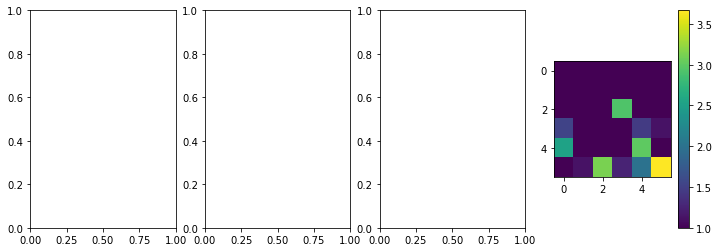

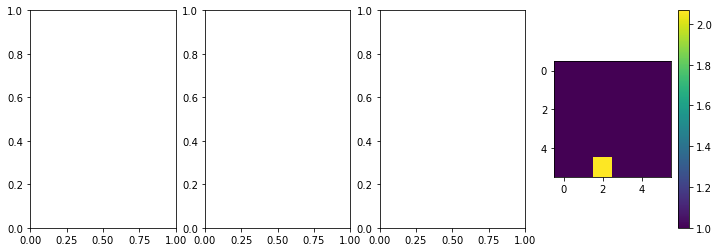

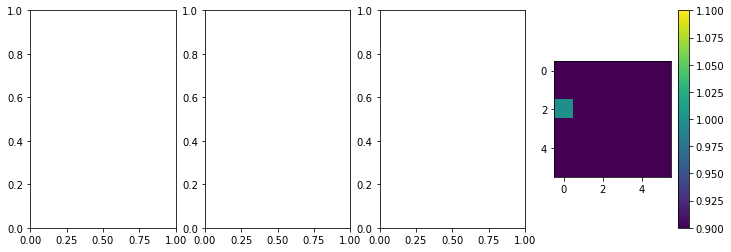

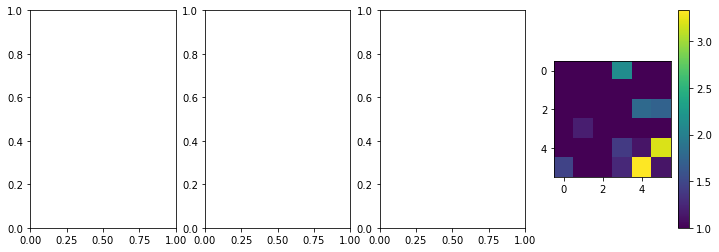

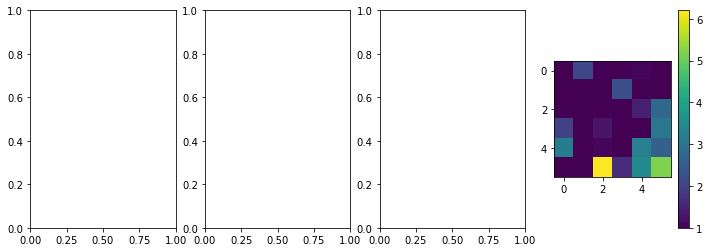

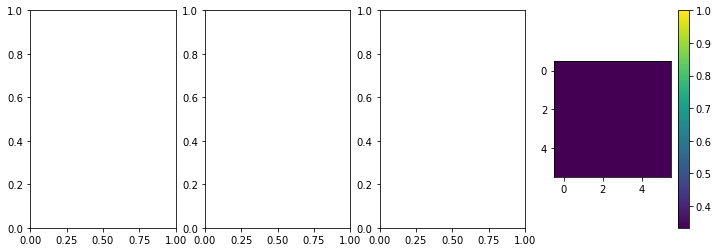

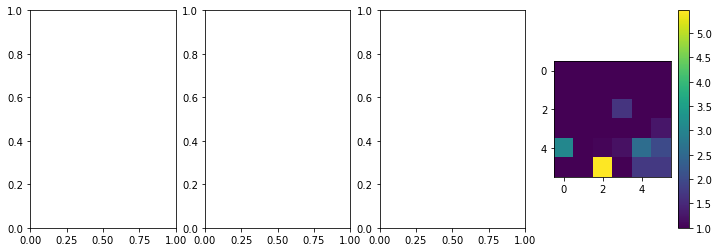

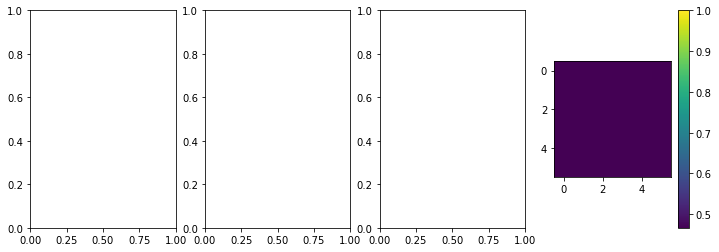

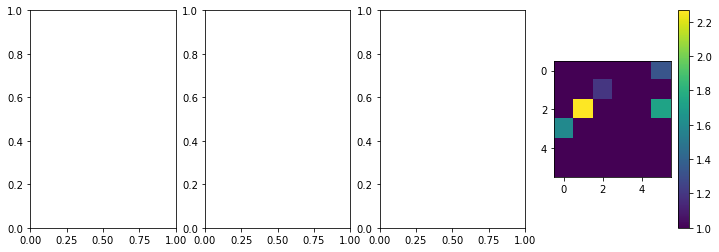

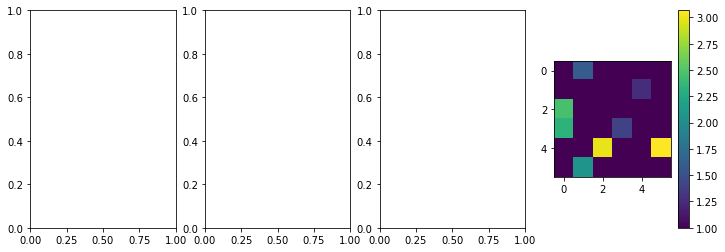

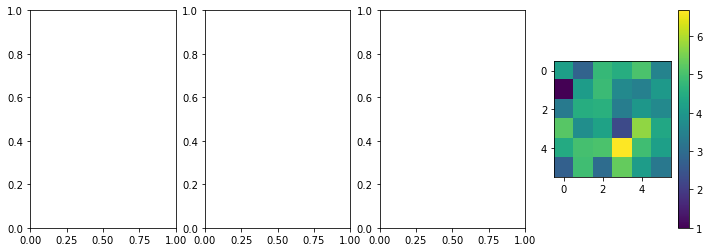

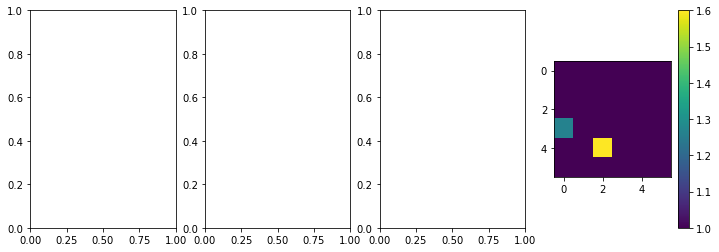

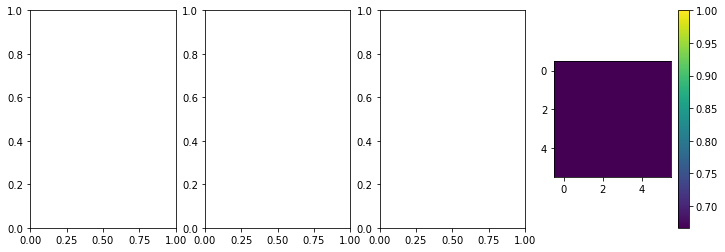

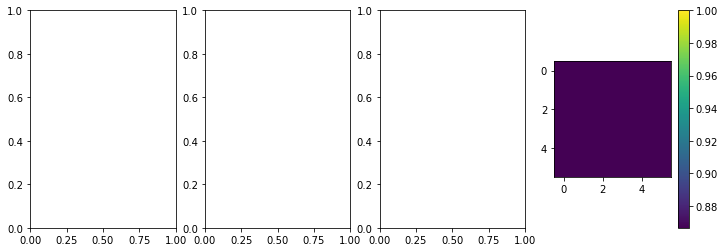

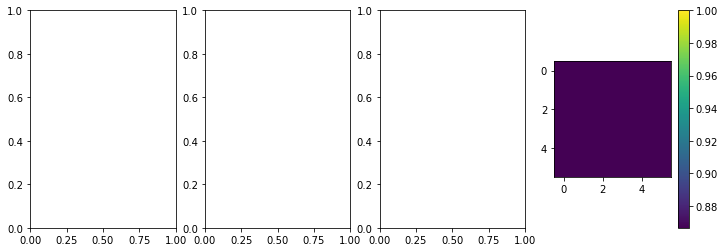

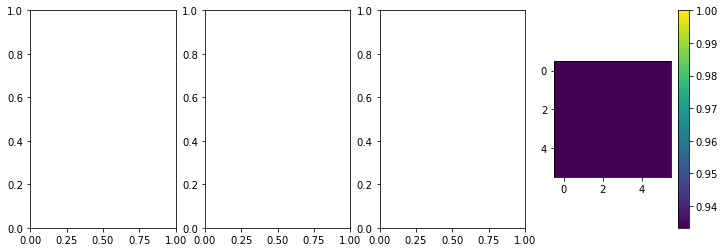

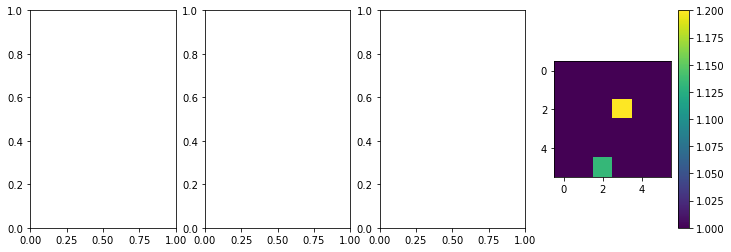

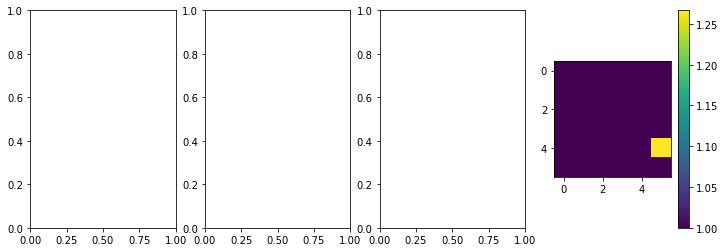

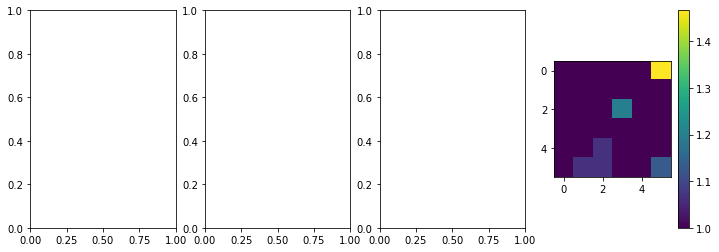

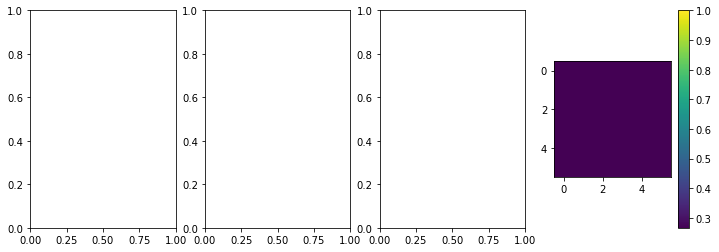

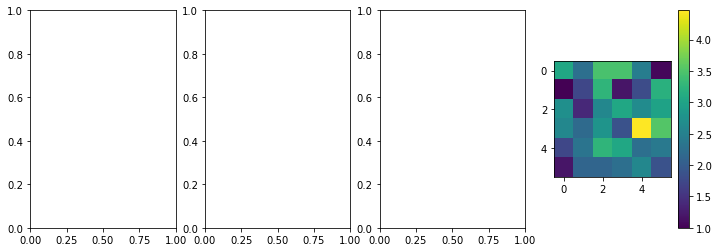

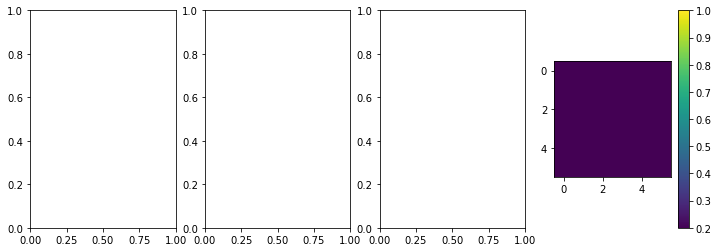

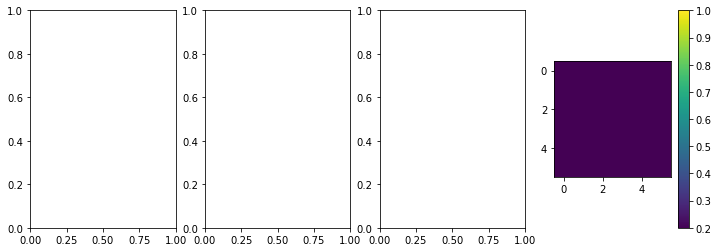

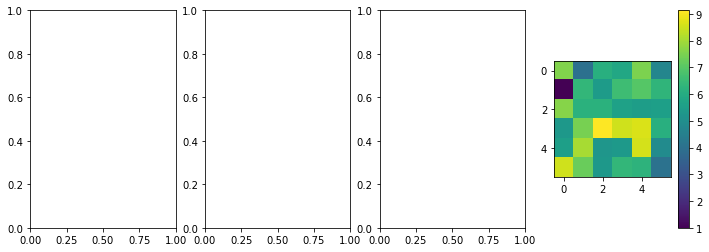

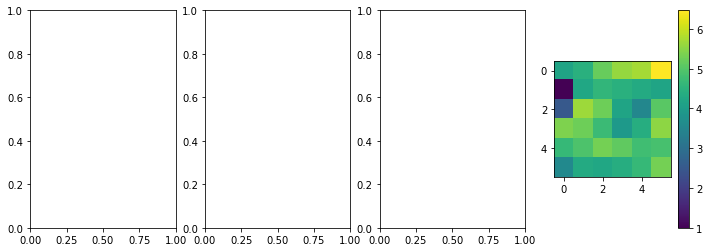

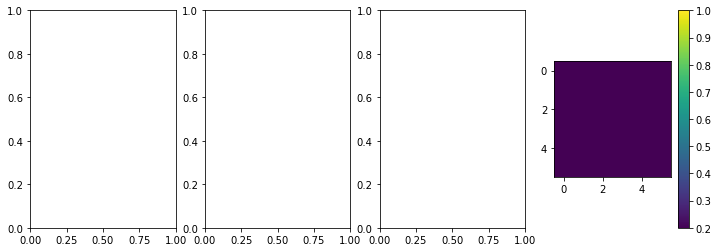

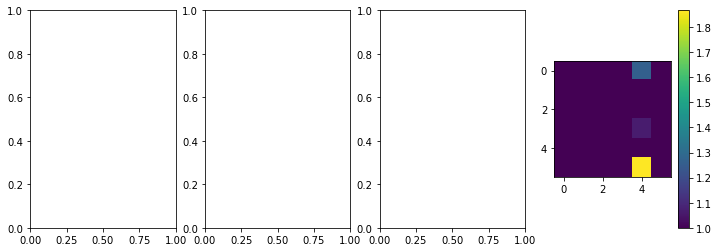

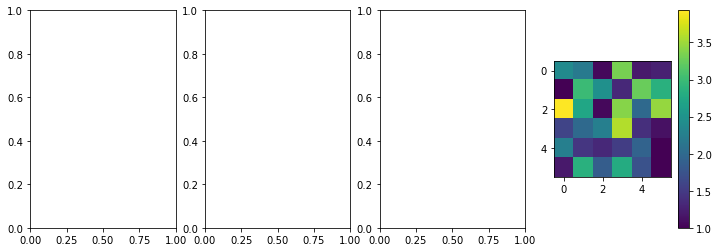

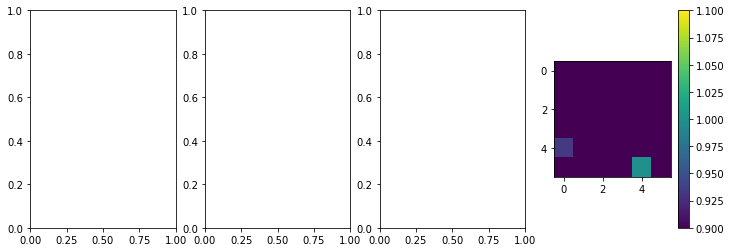

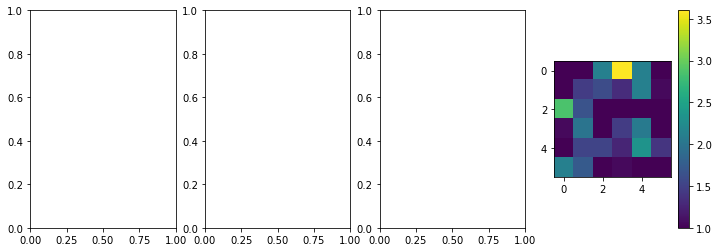

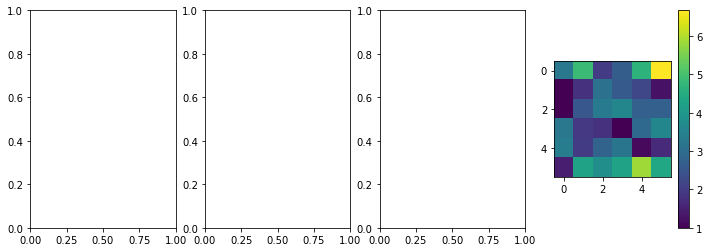

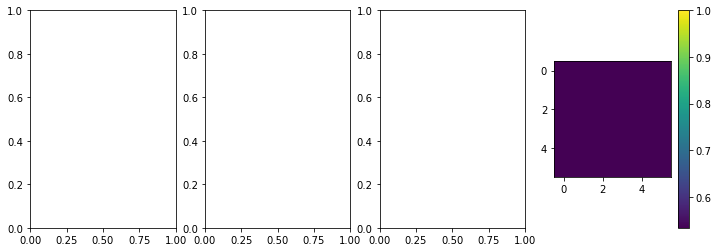

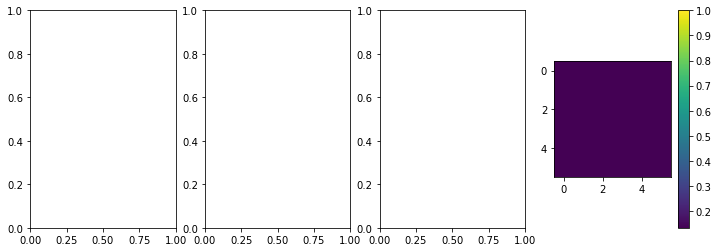

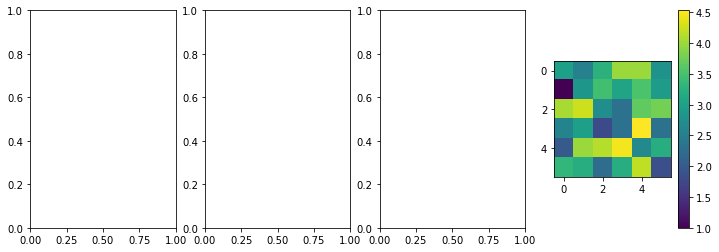

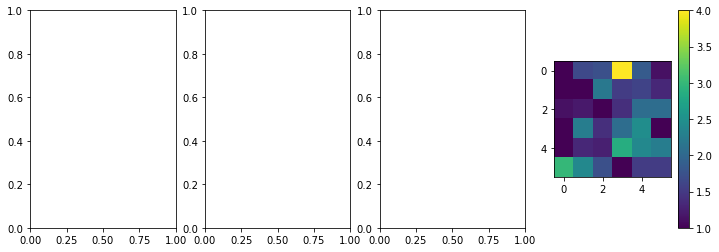

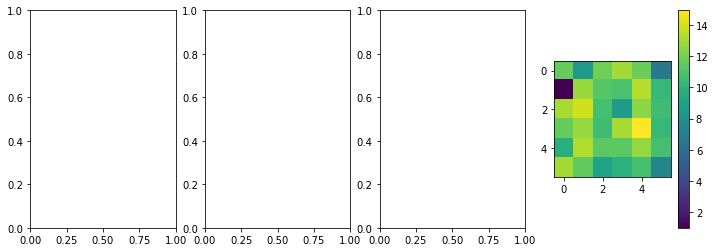

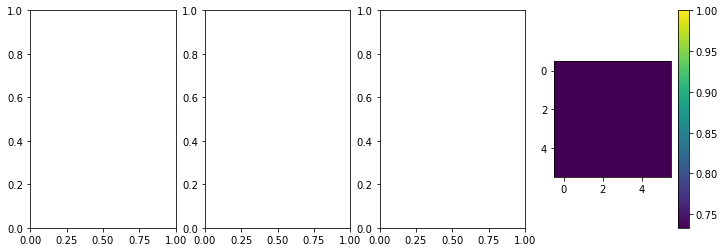

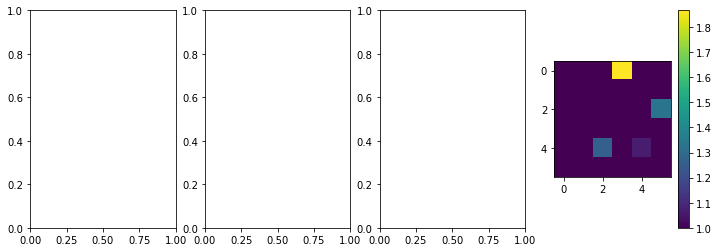

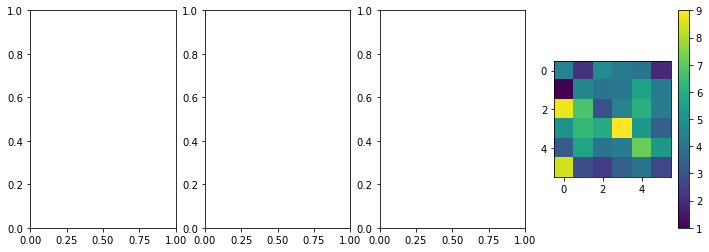

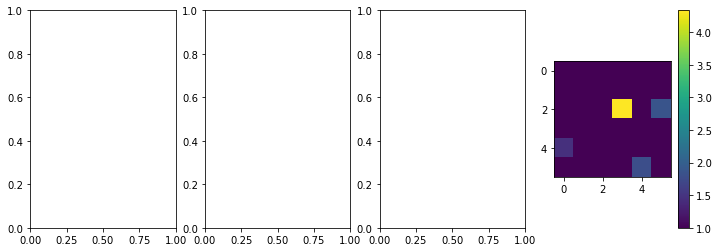

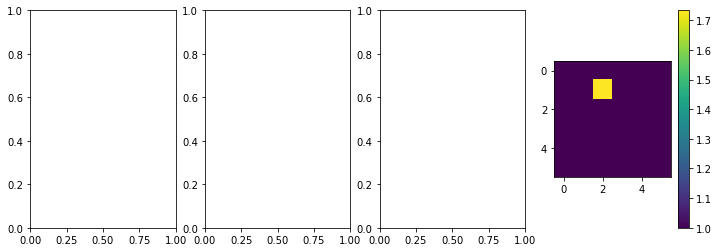

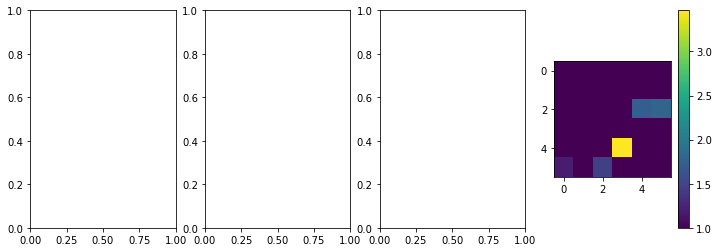

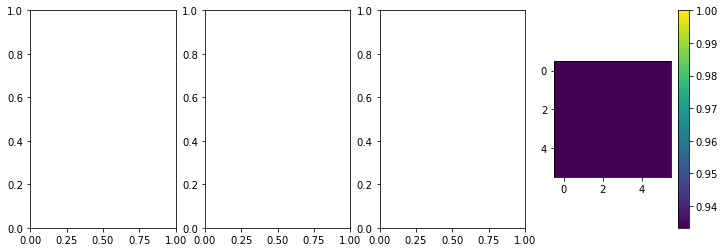

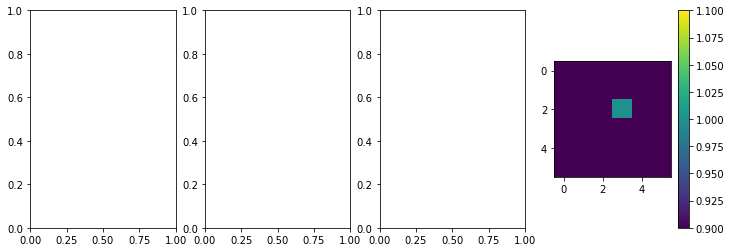

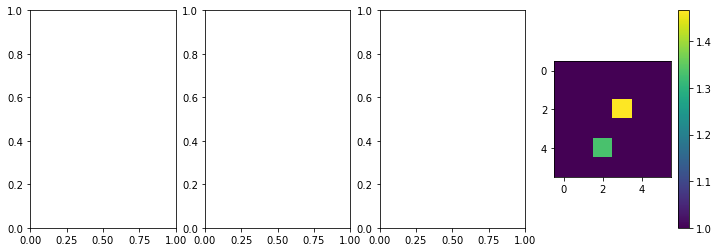

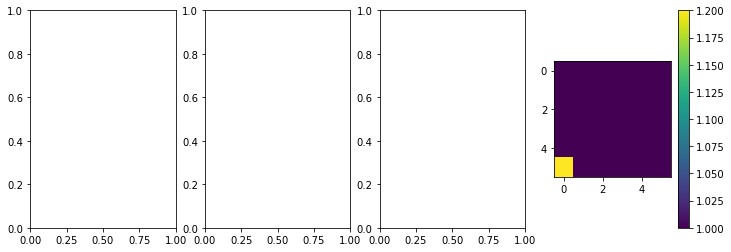

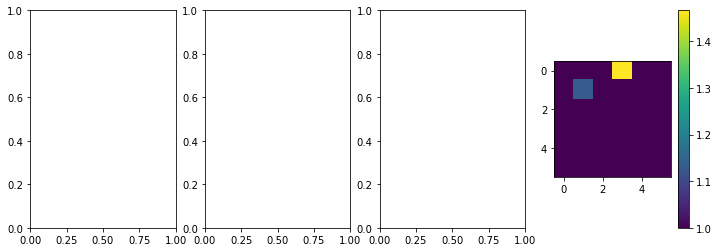

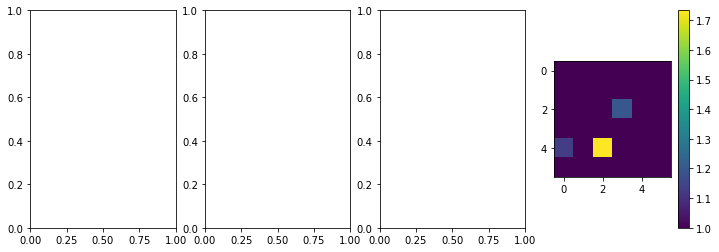

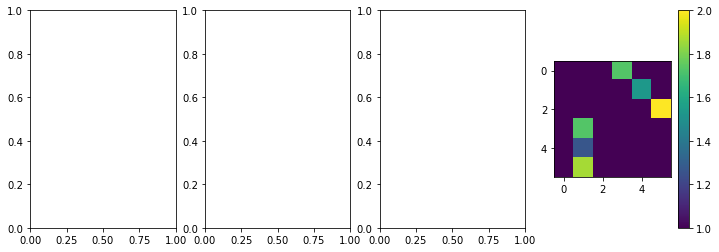

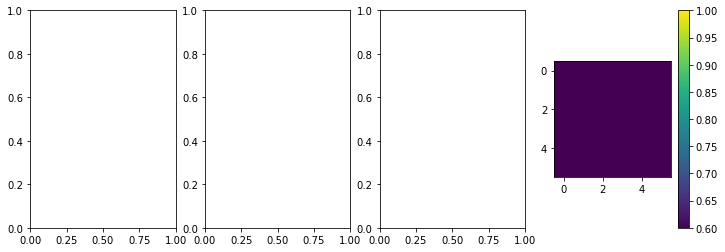

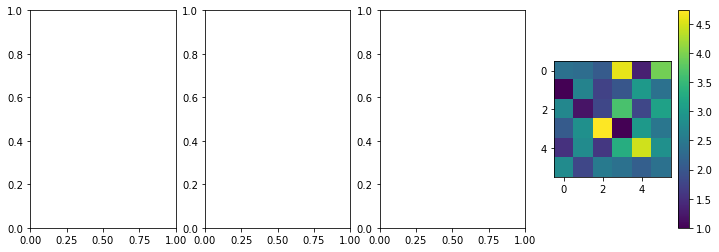

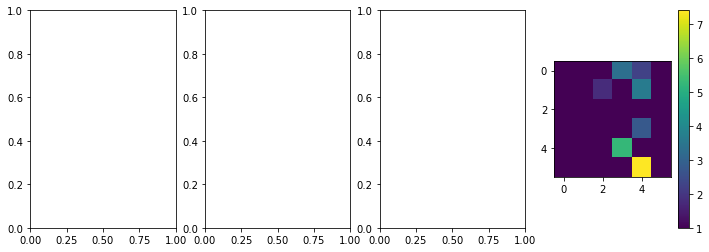

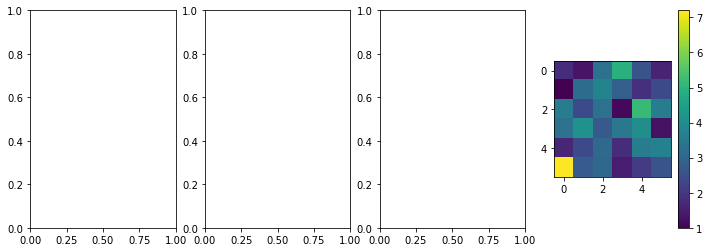

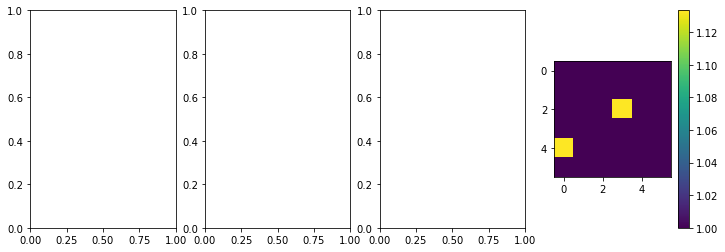

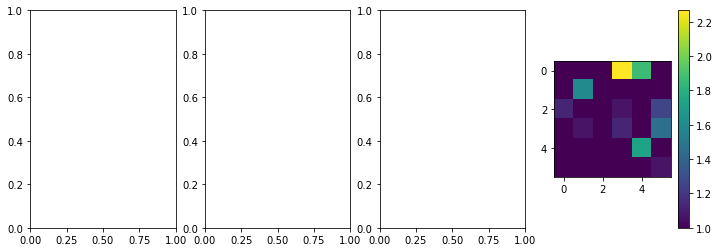

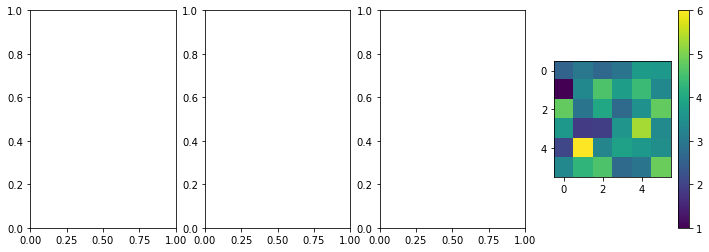

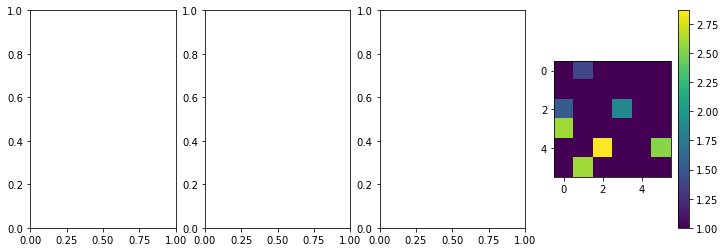

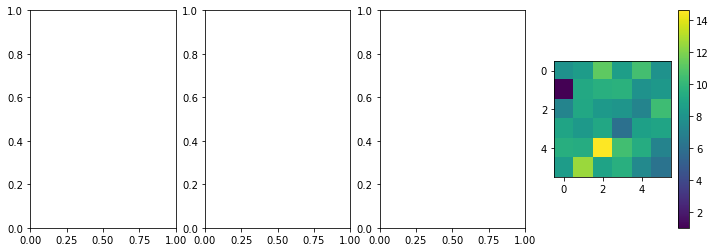

In [ ]:
int_5 = np.arange(0, 2160, 4)
int_10 = np.arange(1, 2160, 4)
int_15 = np.arange(2, 2160, 4)
int_20 = np.arange(3, 2160, 4)

for chan in range(65):
    leds_b, leds = [], []
    fig, axs = plt.subplots(1, 4, figsize=(12, 4))
    for led in int_20:
        leds.append(len(presentation[led][chan]))
        leds_b.append(len(baselines[led][chan]))
    


    leds = np.array(leds).reshape(15, 36)
    leds_b = np.array(leds_b).reshape(15, 36)

    leds = np.mean(leds, axis=0)
    leds_b = np.mean(leds_b, axis=0)

    acti = (leds - leds_b).reshape(6, 6)
    plt.imshow(acti, vmin=1)
    plt.colorbar()
    plt.show()
    plt.close()



In [ ]:
for k in range(144):
    print(np.sum([len(mean_pres[k][c]) for c in range(n_chan)]))

2150
2227
2456
2477
2662
2154
2249
2141
2656
2541
2479
2045
2741
2813
2455
2870
2508
2272
2436
2623
2319
2133
2096
2131
1617
1369
1743
1209
2630
2688
2665
2372
2507
2835
2819
2530
2354
3010
2438
2746
2859
2937
2563
2721
2544
2689
2617
2609
2554
3089
3167
2773
2798
2635
2676
2652
2509
2540
2310
2527
3049
2735
2457
3044
2477
2878
2793
2651
2889
2748
2675
2790
2601
2698
2666
2692
2523
2733
2815
2655
2637
2416
2673
2875
2635
2795
2589
2371
2467
2889
2429
2973
2714
2550
2864
2682
2706
2748
2531
2881
3051
2965
2595
2781
2856
2521
2342
2884
2754
2559
2763
2790
2861
3186
3222
2795
2858
2897
2719
2776
2630
2700
2416
2850
2283
2914
2861
2616
2471
3178
2864
2940
2457
2445
2618
2653
2202
2408
2287
2990
2472
2923
3095
2811


In [ ]:
int_5 = np.arange(0, 144, 4)
int_10 = np.arange(1, 144, 4)
int_15 = np.arange(2, 144, 4)
int_20 = np.arange(3, 144, 4)

In [ ]:
intensities = [int_5, int_10, int_15, int_20]
name_protocol = ['5mW', '10mW', '15mW', '20mW']
for c in range(n_chan):
    #fig, axs = plt.subplots(1, 4)
    evo_spike = []
    for i, intensity in enumerate(intensities):
        heat = np.array([len(mean_pres[led][c]) for led in intensity]).reshape(6, 6)
        evo_spike.append(np.max([len(mean_pres[led][c])for led in intensity])/np.max([len(mean_pres[led][c])for led in int_5]))
    plt.plot(evo_spike)
    plt.savefig('implant_heatmaps/mean_channels_{}.png'.format(c))
    plt.close()

    #     axs[i].imshow(heat)
    #     axs[i].set_title('{}'.format(name_protocol[i]))
    # plt.savefig('implant_heatmaps/channel_{}.png'.format(c))
    # plt.close()


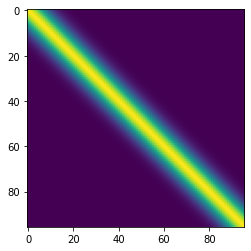

In [ ]:
t = np.load('/home/anverdie/share/gaia/User_folders/Antonin/topelitz_gaussian_cxe_28k.npy', allow_pickle=True)
plt.imshow(t)
plt.savefig('gaussian.svg')